# Team Ursula - Semester Project

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Data Visualization

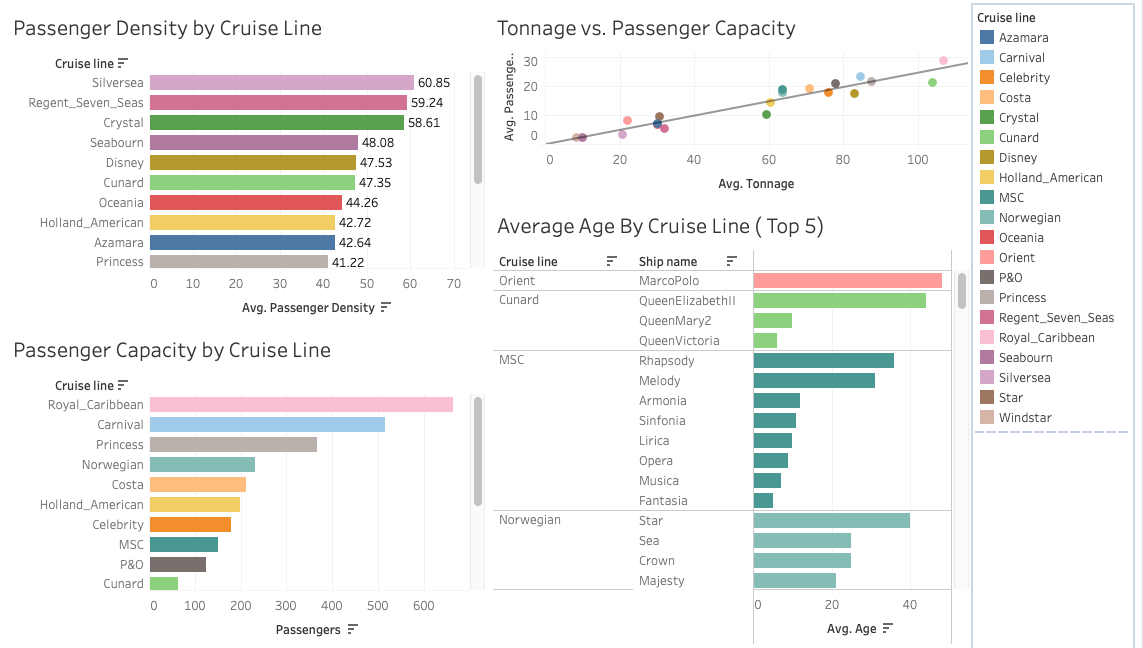

The bar chart titled as “Passenger Density by Cruise Line” compares average passenger density (i.e., crowding levels) by cruise line. The results show that cruise lines like Silversea, Regent_Seven_Seas, and Crystal have higher average passenger density, meaning that these lines are relatively more crowded. While other cruise lines like Royal Caribbean, Carnival, Norwegian, MSC, and Orient have lower average passenger density, meaning that these cruise lines offer more space and comfort for each passenger.

The bar chart titled as “Passenger Capacity by Cruise Line” compares the average number of passengers the ship is designed to carry under normal occupancy conditions across different cruise lines. Results suggest that cruise lines like Royal Caribbean, Carnival, and Princess have much greater passenger capacity than other cruise lines, meaning that they can carry way more passengers than others.

Taken the two graphs together, cruise lines like Royal Caribbean and Carnival balance scale with guest experience, as they operate mega-ships that achieve high total passenger capacity while maintaining relatively moderate passenger density. Their ship designs leverage massive internal volume to offer a better guest experience without sacrificing scale, giving them a competitive edge in the mass-market cruise segment.

The plot titled as "Tonnage vs Passenger Capacity" shows a strong positive linear relationship between ship tonnage and passenger capacity, indicating that large ships generally accommodate more guests. Ships significantly below the trend line likely prioritize guest space and luxury. Overall, this visualization provides a foundational overview of ship design efficiency and space utilization across different cruise lines.

To make the plot titled as "Average Age by Cruise Line (Top 5)", we picked the five cruise lines that have the oldest ships and compared the average age of their ships. Among the selected cruise lines, ship ages range from approximately 7 to over 47 years. Orient’s Marco Polo and Cunard’s Queen Elizabeth II are exceptionally old, with over 40 years of operating history. Meanwhile, Norwegian and Star have relatively newer ships and maintain a more balanced ship age profile, suggesting a gradual modernization strategy. We focused on cruise lines with older ships to target insights into maintenance, guest satisfaction risks, and modernization strategies. As consumer expectations evolve, older ships may face heightened pressure to upgrade or replace ships to stay competitive. On the other hand, lines with a more balanced mix of ship ages may offer both legacy branding and modern experiences.

Based on our findings, we recommend that Lobster Land Management should prioritize using newer, large-capacity ships to maximize exposure to high-volume, modernized traffic while minimizing potential operational risks. However, it is important to note that the dataset reflects average ship-level statistics and may not capture ship-specific refurbishments or modernization investments. Further, passenger density alone does not fully capture onboard experience factors like design innovation or service quality, so additional qualitative research into individual cruise offerings is suggested.

# Summary Stats

In [ ]:
ports = pd.read_csv('caribbean_ports.csv')

In [ ]:
ports.head()

,port_id,port_name,country_or_territory,region,port_type,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
0,1,Cozumel,Mexico,Western,Private,23.7406,-66.7748,187848,13.75,6,8.23,2,0.82,175.22,0.99
1,2,Costa Maya,Mexico,Western,Eco/Nature,13.4943,-65.7182,667075,13.77,3,9.74,10,0.52,100.07,0.78
2,3,Progreso,Mexico,Western,Major,18.9991,-83.1489,177948,12.11,9,8.78,3,0.69,156.40,0.44
3,4,Belize City,Belize,Western,Private,20.3673,-76.0384,452690,4.53,4,12.50,1,0.81,157.05,0.18
4,5,Roatán,Honduras,Western,Private,10.8129,-82.1033,549046,17.20,1,6.39,8,0.75,43.05,0.80


In [ ]:
ports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   port_id                        50 non-null     int64  
 1   port_name                      50 non-null     object 
 2   country_or_territory           50 non-null     object 
 3   region                         50 non-null     object 
 4   port_type                      50 non-null     object 
 5   latitude                       50 non-null     float64
 6   longitude                      50 non-null     float64
 7   avg_annual_visitors            50 non-null     int64  
 8   avg_port_fee_usd               50 non-null     float64
 9   local_attractions_score        50 non-null     int64  
 10  avg_customer_satisfaction      50 non-null     float64
 11  excursion_variety_index        50 non-null     int64  
 12  avg_disembark_rate             50 non-null     float

**Data Type**

**Categorical Variables:** port_id, port_name, country_or_territory, region, port_type

**Numerical Variables:** latitude, longitude, avg_annual_visitors, avg_port_fee_usd, local_attraction_score, avg_customer_satisfaction, excursion_variety_index, avg_disembark_rate, avg_shore_spend_per_passenger, seasonality_score

In [ ]:
ports.describe()

,port_id,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
count,50.00000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,18.470906,-72.804902,7.061286e+05,10.706200,4.440000,8.19820,5.980000,0.764000,112.894200,0.566200
std,14.57738,5.560868,7.250157,4.517732e+05,5.430777,2.865417,1.27086,3.040475,0.165603,58.994124,0.284461
min,1.00000,10.096600,-84.364500,7.195900e+04,-3.500000,1.000000,6.12000,1.000000,0.510000,-45.000000,0.110000
25%,13.25000,13.441650,-79.151925,2.761048e+05,5.802500,2.250000,7.37250,4.000000,0.640000,56.592500,0.350000
50%,25.50000,18.832350,-72.470400,6.993720e+05,12.055000,4.000000,8.27000,6.000000,0.790000,117.295000,0.570000
75%,37.75000,23.696650,-66.013100,1.065037e+06,14.460000,6.000000,9.05000,9.000000,0.897500,163.442500,0.795000
max,50.00000,27.270500,-61.757600,1.492646e+06,18.920000,15.000000,12.50000,10.000000,1.200000,197.660000,0.990000


**Impossible Values**

**avg_port_fee_usd:** Minimum is -4, but the values of this variable should be greater than 0.

**local_attractions_score:** Maximum is 15, but scores should range from 1 to 10.

**avg_customer_satisfaction:** Maximum is 12, but the valid scale is 1-10.

**avg_shore_spend_per_passenger:** Minimum is -45, but the values of this variable should be greater than 0.

In [ ]:
impossible_values = {
    "avg_port_fee_usd": ports["avg_port_fee_usd"] <= 0,
    "local_attractions_score": ~ports["local_attractions_score"].between(1, 10),
    "avg_customer_satisfaction": ~ports["avg_customer_satisfaction"].between(1, 10),
    "avg_shore_spend_per_passenger": ports["avg_shore_spend_per_passenger"] <= 0
}

impossible_counts = {var: condition.sum() for var, condition in impossible_values.items()}
pd.DataFrame.from_dict(impossible_counts, orient='index', columns=["Impossible Value Count"])

,Impossible Value Count
avg_port_fee_usd,1
local_attractions_score,1
avg_customer_satisfaction,1
avg_shore_spend_per_passenger,1


In [ ]:
ports = ports.drop(ports[
    (ports['avg_port_fee_usd'] <= 0) |
    (ports['local_attractions_score'] < 1) | (ports['local_attractions_score'] > 10) |
    (ports['avg_customer_satisfaction'] < 1) | (ports['avg_customer_satisfaction'] > 10) |
    (ports['avg_shore_spend_per_passenger'] <= 0)
].index)


In [ ]:
ports.isnull().sum()

,0
port_id,0
port_name,0
country_or_territory,0
region,0
port_type,0
latitude,0
longitude,0
avg_annual_visitors,0
avg_port_fee_usd,0
local_attractions_score,0


**Missing Value**

The results above suggest that there is no missing value in the dataset.

**Average Annual Visitors by Port Name (Top 5)**

In [ ]:
visitors_by_port = ports.groupby("port_name")["avg_annual_visitors"].mean().sort_values(ascending=False).head(5)
visitors_by_port

,avg_annual_visitors
port_name,
Puerto Plata,1492646.0
Ponce,1479626.0
Santo Domingo,1450804.0
Princess Cays,1434250.0
St. Maarten,1413453.0


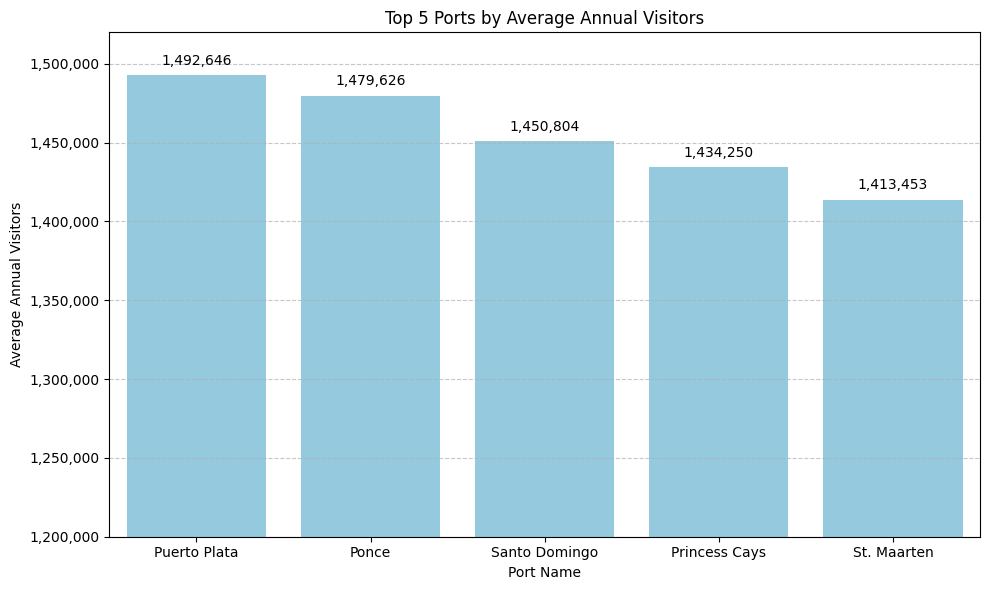

In [ ]:
from matplotlib.ticker import FuncFormatter

visitors_by_port = visitors_by_port.reset_index()

plt.figure(figsize=(10, 6))
alpha = sns.barplot(data=visitors_by_port, x="port_name", y="avg_annual_visitors", color="skyblue")
plt.title("Top 5 Ports by Average Annual Visitors")
plt.xlabel("Port Name")
plt.ylabel("Average Annual Visitors")
plt.ylim(1_200_000, 1_520_000)

alpha.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
for bar in alpha.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5000, f'{int(height):,}',
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Average Customer Satisfaction by Region**

In [ ]:
satisfaction = ports.groupby("region")["avg_customer_satisfaction"].mean().sort_values(ascending=False)
satisfaction

,avg_customer_satisfaction
region,
Bahamas,8.297143
Eastern,8.188571
Southern,7.950909
Western,7.845714


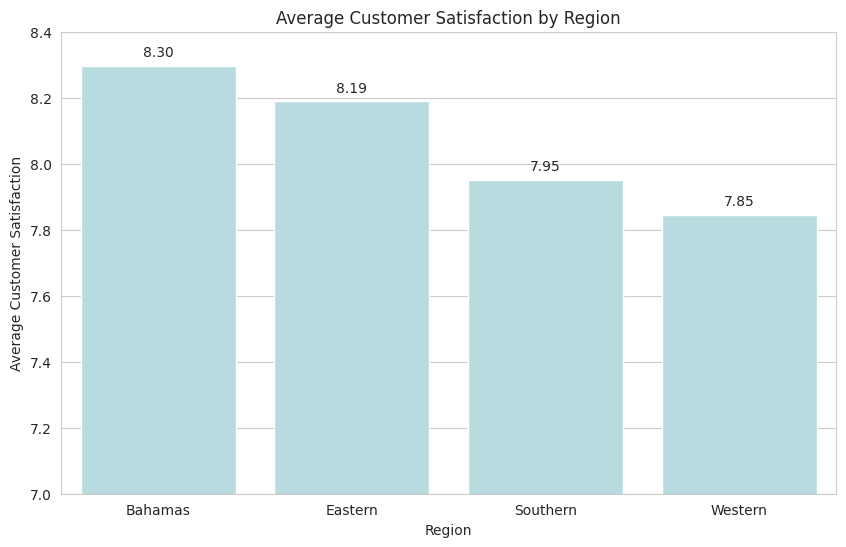

In [ ]:
satisfaction = satisfaction.reset_index()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
beta = sns.barplot(data=satisfaction, x="region", y="avg_customer_satisfaction", color="powderblue")
plt.title("Average Customer Satisfaction by Region")
plt.xlabel("Region")
plt.ylabel("Average Customer Satisfaction")
plt.ylim(7,8.4)

for bar in beta.patches:
    height = bar.get_height()
    beta.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}',
            ha='center', va='bottom', fontsize=10)

plt.show()

**Average Ashore Spending by Port Type**

In [ ]:
spending = ports.groupby("port_type")["avg_shore_spend_per_passenger"].mean().sort_values(ascending=False)
spending

,avg_shore_spend_per_passenger
port_type,
Major,120.343750
Boutique,119.862727
Eco/Nature,117.466875
Private,99.833636


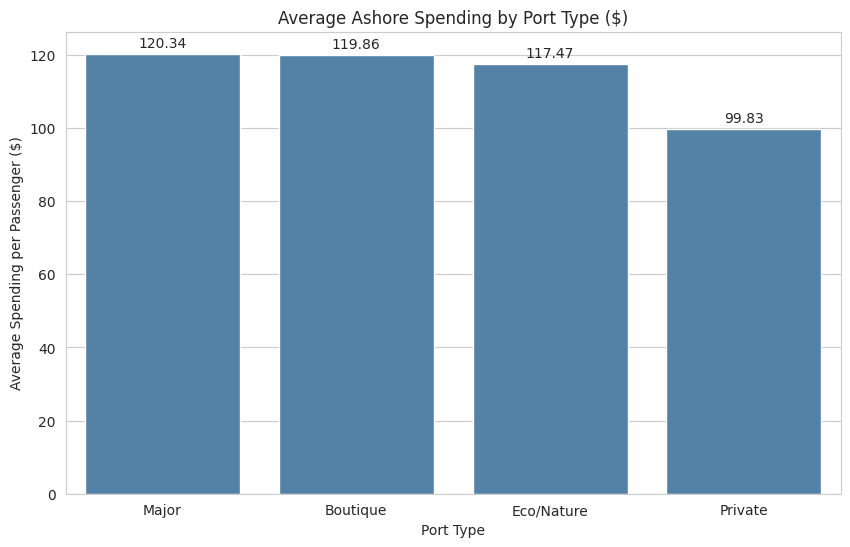

In [ ]:
spending = spending.reset_index()

plt.figure(figsize=(10, 6))
gamma = sns.barplot(data=spending, x="port_type", y="avg_shore_spend_per_passenger", color="steelblue")
plt.title("Average Ashore Spending by Port Type ($)")
plt.xlabel("Port Type")
plt.ylabel("Average Spending per Passenger ($)")

for bar in gamma.patches:
    height = bar.get_height()
    gamma.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:,.2f}", ha='center', va='bottom', fontsize=10)

**Average Shore Excursion by Region**

In [ ]:
shore_excursion = ports.groupby("region")["excursion_variety_index"].mean().sort_values(ascending=False)
shore_excursion

,excursion_variety_index
region,
Bahamas,7.000000
Eastern,6.571429
Western,5.714286
Southern,5.181818


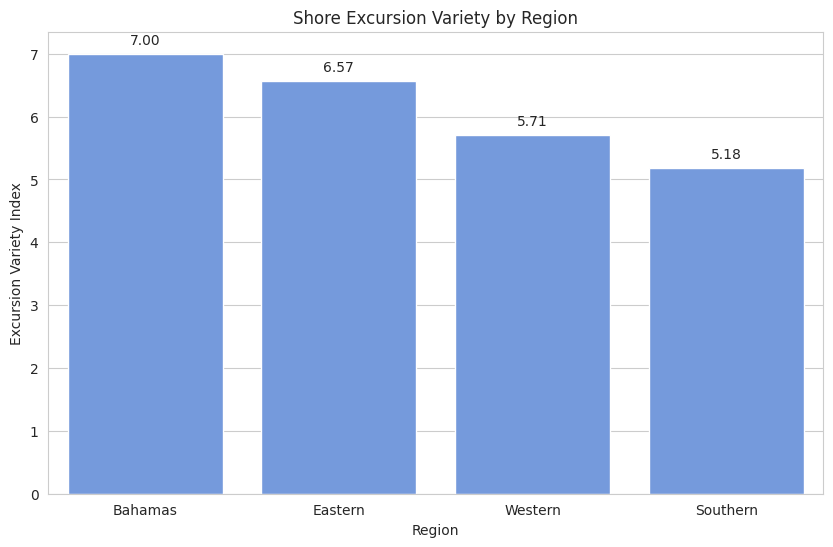

In [ ]:
shore_excursion = shore_excursion.reset_index()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
delta = sns.barplot(data=shore_excursion, x="region", y="excursion_variety_index", color="cornflowerblue")
plt.title("Shore Excursion Variety by Region")
plt.xlabel("Region")
plt.ylabel("Excursion Variety Index")

for bar in delta.patches:
    height = bar.get_height()
    delta.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{height:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

**Findings**

From the visual analysis of Caribbean cruise port data, several actionable insights emerge. First, **three of the top five ports by annual visitor volume—Puerto Plata, Ponce, and St. Maarten—are located in the Eastern Caribbean**, indicating this sub-region draws a consistently high volume of cruise travelers. This aligns with the second finding: **the Eastern Caribbean ranks second in both customer satisfaction and shore excursion variety,** just behind the Bahamas, suggesting that this region not only attracts high traffic but also delivers satisfying and diverse passenger experiences.

Additionally, when analyzing **average ashore spending by port type, Major and Boutique ports show the highest passenger spending,** with only a marginal difference between them. This suggests that both high-traffic infrastructure and more curated, upscale experiences appeal to travelers and lead to higher onboard-to-shore revenue conversion.

For Lobster Land, which may be exploring regional expansion, vendor partnerships, or targeted marketing, these patterns suggest strong **opportunities in the Eastern Caribbean and the Bahamas, especially at Major and Boutique ports**, where both traffic and spending levels are high. These areas may offer the best return on investment for experiential offerings, pop-up activations, or new retail ventures.

# Segmentation and Targeting

Jean & Leo

In [ ]:
ports = pd.read_csv('caribbean_ports.csv')
print(ports.head())

   port_id    port_name country_or_territory   region   port_type  latitude  \
0        1      Cozumel               Mexico  Western     Private   23.7406   
1        2   Costa Maya               Mexico  Western  Eco/Nature   13.4943   
2        3     Progreso               Mexico  Western       Major   18.9991   
3        4  Belize City               Belize  Western     Private   20.3673   
4        5       Roatán             Honduras  Western     Private   10.8129   

   longitude  avg_annual_visitors  avg_port_fee_usd  local_attractions_score  \
0   -66.7748               187848             13.75                        6   
1   -65.7182               667075             13.77                        3   
2   -83.1489               177948             12.11                        9   
3   -76.0384               452690              4.53                        4   
4   -82.1033               549046             17.20                        1   

   avg_customer_satisfaction  excursion_vari

In [ ]:
missing_values = ports.isnull().sum()
print(missing_values)

port_id                          0
port_name                        0
country_or_territory             0
region                           0
port_type                        0
latitude                         0
longitude                        0
avg_annual_visitors              0
avg_port_fee_usd                 0
local_attractions_score          0
avg_customer_satisfaction        0
excursion_variety_index          0
avg_disembark_rate               0
avg_shore_spend_per_passenger    0
seasonality_score                0
dtype: int64


In [ ]:
#Using only numeric variables for clustering
numeric_cols = [
    'avg_annual_visitors',
    'avg_port_fee_usd',
    'local_attractions_score',
    'avg_customer_satisfaction',
    'excursion_variety_index',
    'avg_disembark_rate',
    'avg_shore_spend_per_passenger',
    'seasonality_score'
]

X = ports[numeric_cols].dropna()

In [ ]:
#Standardizing data to make sure they're on the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

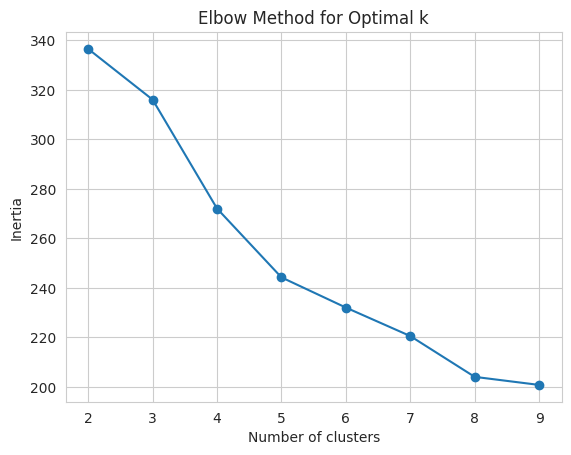

In [ ]:
#Kmeans to identify number of clusters
inertia = []
k_range = range(2, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=654)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
#Assigning each port to a cluster
kmeans = KMeans(n_clusters=3, random_state=42)
ports['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
cluster_counts = ports['cluster'].value_counts()
print(cluster_counts)

cluster
1    21
0    18
2    11
Name: count, dtype: int64


We chose to segment the ports into three clusters to distribute the ports evenly across groups. Segmentation over three clusters resulted in at least one minority cluster with a significantly smaller number of ports, which could have affected strategic decision-making. Considering that this is Lobster Land’s first venture into the cruise business, we wanted a balanced segmentation that offers a comprehensive view across different types of ports.

By focusing on three clusters, we can more effectively align port profiles with specific business strategies and abilities. We also preferred to concentrate on ports with proven popularity and strong visitor traffic, rather than investing heavily in less preferred or more experimental destinations at this early stage. This approach allows Lobster Land to build a strong foundation in the cruise market while still leaving room for future innovation and expansion once brand credibility and operational experience grow.

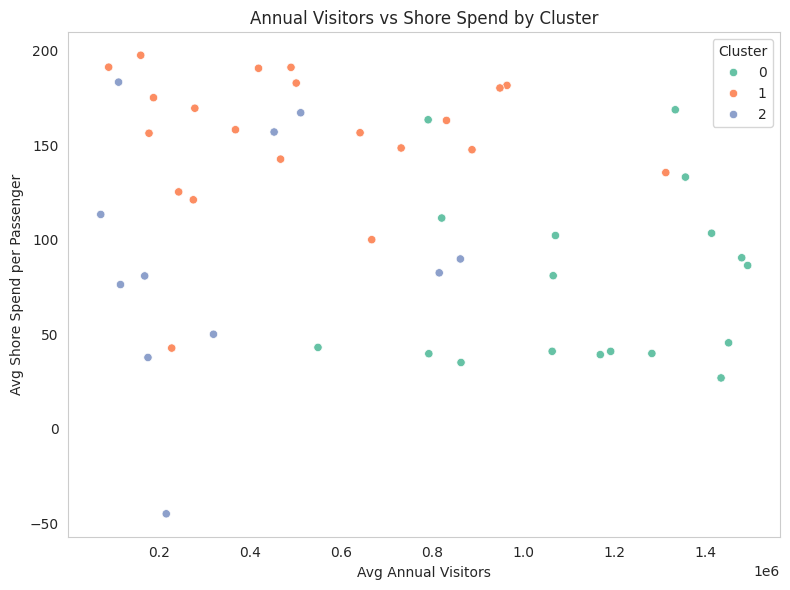

In [ ]:
#Visualizations to help communicate information from the model
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ports, x='avg_annual_visitors', y='avg_shore_spend_per_passenger', hue='cluster', palette='Set2')
plt.title('Annual Visitors vs Shore Spend by Cluster')
plt.xlabel('Avg Annual Visitors')
plt.ylabel('Avg Shore Spend per Passenger')
plt.legend(title='Cluster')
plt.grid(False)
plt.tight_layout()
plt.show()

This scatterplot explores the potential relationship between average annual visitors and shore spend per passenger across clusters. While there is no clear linear trend within any individual cluster, a rough differentiation can be observed:

- Cluster 1 ports tend to attract fewer visitors but generate higher average spending per passenger.

- Cluster 0 ports typically handle larger visitor volumes but yield lower per-passenger spending.

There's also considerable overlap between clusters, suggesting that other variables — such as customer satisfaction, excursion variety, or seasonality — likely played a stronger role in shaping the segmentation results.

<ipython-input-25-5f8cfbd73814>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ports, x='cluster', y='avg_customer_satisfaction', palette='Set3')


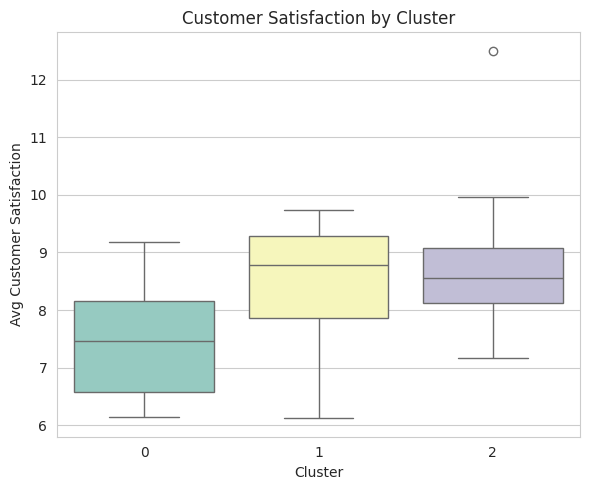

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=ports, x='cluster', y='avg_customer_satisfaction', palette='Set3')
plt.title('Customer Satisfaction by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Avg Customer Satisfaction')
plt.tight_layout();
plt.show()

This boxplot displays the distribution of average customer satisfaction scores across the three clusters.

Cluster 1 exhibits the highest overall satisfaction, although it also has the widest interquartile range, indicating more variability among ports in that group. In contrast, Cluster 0 shows the lowest satisfaction but a narrower IQR, suggesting more consistency in traveler feedback.

Since the satisfaction scale ranges from 0 to 10, even small differences can meaningfully impact passenger experience. Cluster 2 falls in a mid-to-high satisfaction band and overlaps slightly with the other two, making it more heterogeneous.

Notably, Cluster 2 includes one extreme outlier with a score above 12, which is likely a data entry error and should be flagged for correction.

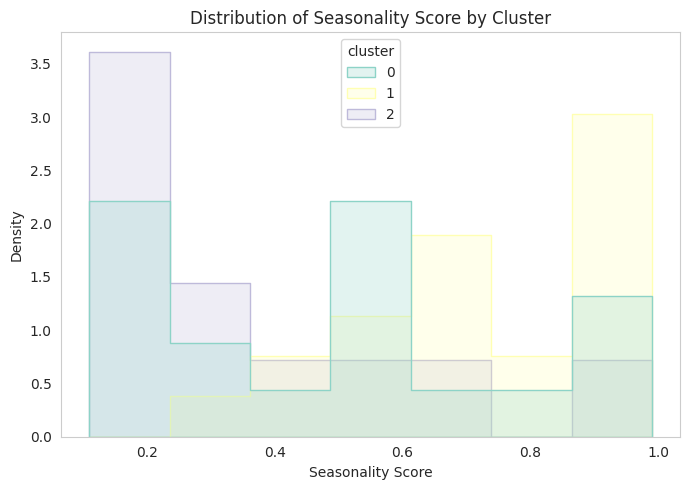

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(data=ports, x='seasonality_score', hue='cluster', element='step', stat='density', common_norm=False, palette='Set3')
plt.title('Distribution of Seasonality Score by Cluster')
plt.xlabel('Seasonality Score')
plt.ylabel('Density')
plt.grid(False)
plt.tight_layout()
plt.show()

This histogram displays the distribution of seasonality scores across the three clusters, offering insight into how seasonal fluctuations vary between port groups.

- Cluster 1 ports show high seasonality, with the majority concentrated in the upper range (0.8–1.0). These ports are more sensitive to time-of-year fluctuations and may require flexible itinerary planning.

- Cluster 0 has a more even distribution across low to moderate seasonality levels, indicating more operational flexibility.

- Cluster 2 exhibits low seasonality, with most ports concentrated in the 0.1–0.4 range — making them attractive for year-round cruising.

The limited overlap between the clusters suggests that seasonality is a strong segmenting variable in this analysis.

<ipython-input-27-8a37c41e2b46>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ports, x='seasonality_category', y='avg_annual_visitors', palette='Set3')


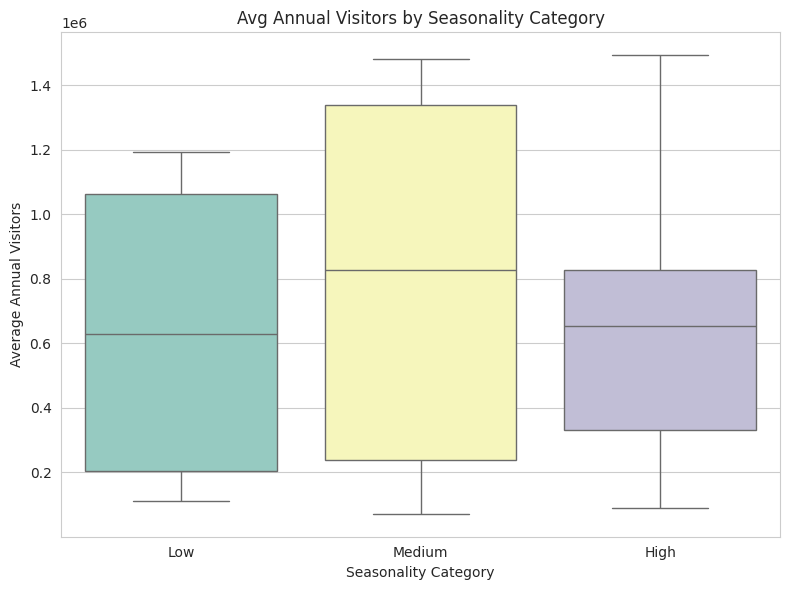

In [ ]:
# Create seasonality categories
ports['seasonality_category'] = pd.cut(ports['seasonality_score'],
                                       bins=[0, 0.33, 0.66, 1],
                                       labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8,6))
sns.boxplot(data=ports, x='seasonality_category', y='avg_annual_visitors', palette='Set3')
plt.title('Avg Annual Visitors by Seasonality Category')
plt.xlabel('Seasonality Category')
plt.ylabel('Average Annual Visitors')
plt.tight_layout()
plt.show()

<ipython-input-28-8eedc4ddf257>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_excursions.index, y=avg_excursions.values, palette='Set3')


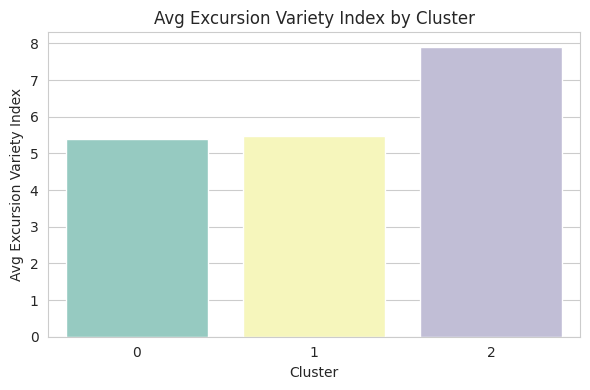

In [ ]:
avg_excursions = ports.groupby('cluster')['excursion_variety_index'].mean().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_excursions.index, y=avg_excursions.values, palette='Set3')
plt.title('Avg Excursion Variety Index by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Avg Excursion Variety Index')
plt.tight_layout()
plt.show()

This bar plot compares the average excursion variety index across clusters. Ports in Cluster 2 clearly stand out, offering the highest variety of shore excursions on average. In contrast, Clusters 0 and 1 provide similar, but noticeably lower, levels of excursion diversity.

These results suggest that Cluster 2 ports may appeal more to adventure-seeking travelers or those who value diverse experiences. These ports could be excellent additions to itineraries targeting active or exploratory customer segments.

In [ ]:
print(ports.head())
print(ports['cluster'].unique())

   port_id    port_name country_or_territory   region   port_type  latitude  \
0        1      Cozumel               Mexico  Western     Private   23.7406   
1        2   Costa Maya               Mexico  Western  Eco/Nature   13.4943   
2        3     Progreso               Mexico  Western       Major   18.9991   
3        4  Belize City               Belize  Western     Private   20.3673   
4        5       Roatán             Honduras  Western     Private   10.8129   

   longitude  avg_annual_visitors  avg_port_fee_usd  local_attractions_score  \
0   -66.7748               187848             13.75                        6   
1   -65.7182               667075             13.77                        3   
2   -83.1489               177948             12.11                        9   
3   -76.0384               452690              4.53                        4   
4   -82.1033               549046             17.20                        1   

   avg_customer_satisfaction  excursion_vari

In [ ]:
#Renaming clusters to use in visualization
cluster_names = {
    0: 'Popular Tourist Ports',
    1: 'Premium Experience Ports',
    2: 'Niche Interest Ports'}

ports['cluster_name_new'] = ports['cluster'].map(cluster_names)

**Cluster Names**

- Cluster 0 = Popular Tourist Ports:

This cluster includes primarily Private and Major ports, heavily located in the Western Caribbean and Southern regions. These ports welcome a high number of visitors, and disembarkation rates are consistently high, often above 0.8.

Moreover, their port fees range from mid to high, and customer satisfaction is moderate to good with noticeable variance. There’s also a broad range in shore spend, from as low as 27 dollars to as high as 168 dollars, indicating mixed consumer reactions. These are well-frequented, accessible ports with broad appeal — ideal for high-volume, family-friendly itineraries.

- Cluster 1 = Premium Experience Ports:

Ports in this cluster span various types (Eco/Nature, Major, Boutique) and are mostly located in the Eastern and Southern Caribbean. This group stands out with very high customer satisfaction (often above 9.0), strong shore spend levels (frequently 150+ dollars), and moderate to high excursion variety.

With their healthy disembarkation rates, and port fees are among the highest observed in the dataset. These ports are ideal for guests seeking quality, variety, and immersive experiences, and are well-positioned for premium cruise lines and affluent traveler segments.

- Cluster 2 = Niche Interest Ports

This is the smallest cluster, and includes a mix of Private, Boutique, and Eco/Nature ports spread across various regions. Visitor volume is generally low to moderate, port fees are on the lower end, and attraction scores are often minimal (many below 3).

Despite this, ports here often exhibit high disembarkation rates and above-average satisfaction, suggesting guests who do visit tend to enjoy the experience. Some entries have very low shore spend, while others peak over $150 — indicating polarizing guest behavior. This cluster is ideal for targeting adventurers, niche travelers, or off-the-beaten-path excursions with focused marketing.

In [ ]:
summary_df = pd.DataFrame({
    "Cluster Name": [
        "Popular Tourist Ports",
        "Premium Experience Ports",
        "Niche Interest Ports"
    ],
    "Avg Visitors": ["~1.1 million", "~520,000", "~350,000"],
    "Avg Shore Spend": ["$77", "$160+", "$90"],
    "Avg Satisfaction": [7.6, 8.4, 8.9],
    "Key Traits": [
        "High volume, moderate satisfaction",
        "High-end spenders, luxury positioning",
        "Small-scale, highly satisfied, diverse"
    ]
})

summary_df.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'left')]},
    {'selector': 'td', 'props': [('text-align', 'left')]}
]).set_properties(**{'font-size': '14px'})

,Cluster Name,Avg Visitors,Avg Shore Spend,Avg Satisfaction,Key Traits
0,Popular Tourist Ports,~1.1 million,$77,7.600000,"High volume, moderate satisfaction"
1,Premium Experience Ports,"~520,000",$160+,8.400000,"High-end spenders, luxury positioning"
2,Niche Interest Ports,"~350,000",$90,8.900000,"Small-scale, highly satisfied, diverse"


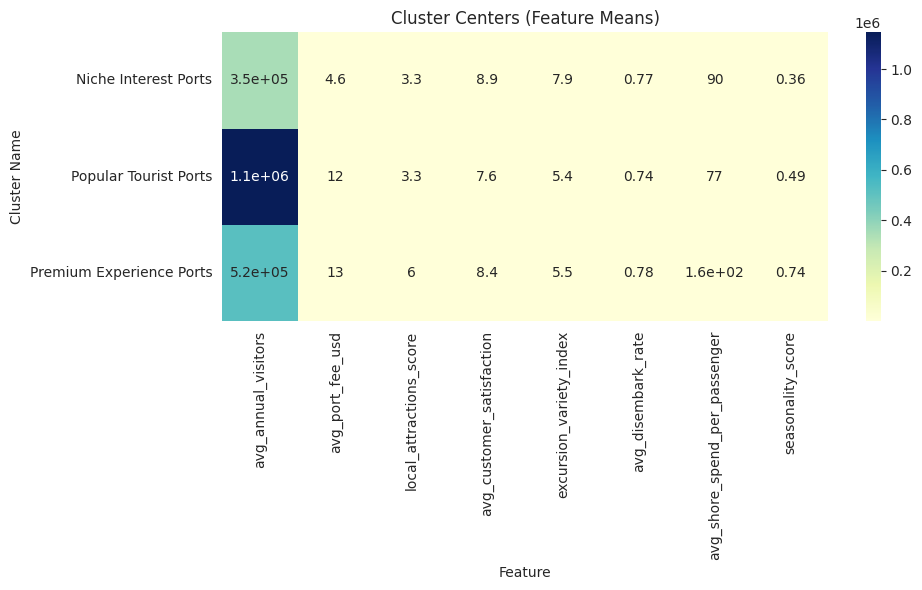

In [ ]:
#Change colours
# Prepare and scale the data
X = ports[numeric_cols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
ports['cluster'] = kmeans.fit_predict(X_scaled)

# Group and average using renamed clusters
cluster_means_named = ports.groupby('cluster_name_new')[numeric_cols].mean().round(2)

# Plot heatmap with named clusters
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means_named, annot=True, cmap='YlGnBu')
plt.title('Cluster Centers (Feature Means)')
plt.ylabel('Cluster Name')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

The heatmap displays the average values of key numeric features across the three identified port clusters, offering a clear picture of each group’s operational and experiential profile. These values serve as “fingerprints” for each cluster, allowing Lobster Land to differentiate port types not just by geography, but by visitor behavior and economic potential.

Niche Interest Ports stand out for their lower average annual visitors, around 350,000, and the lowest port fees among all clusters. While these ports are smaller in scale and have relatively modest local attraction scores (3.3), they deliver the highest average customer satisfaction (8.9) and the richest excursion variety index (7.9). Despite their niche positioning, passengers spend a respectable 90 dollars per person on shore, and the seasonality score is notably low at 0.36, suggesting these ports may offer a more stable year-round experience. This cluster likely appeals to more adventurous or experience-driven travelers who value unique, less crowded destinations and diverse activity options.

In contrast, Popular Tourist Ports are characterized by the highest average number of annual visitors—around 1.1 million—indicating that these ports serve as high-volume, mainstream destinations. Port fees are moderately high at 12 dollars, and while customer satisfaction (7.6) and excursion variety (5.4) lag behind the other clusters, the disembark rate remains strong at 0.74. The average shore spend per passenger is approximately 77 dollars, and seasonality is moderate at 0.49. These ports reflect the classic Caribbean cruise experience—efficient, familiar, and accessible to large numbers of travelers. While they may lack exclusivity or personalized appeal, they are ideal for itineraries prioritizing scale and convenience.

Meanwhile, Premium Experience Ports represent the most aligned destinations for advancing Lobster Land’s identity as a premium, experience-driven cruise brand. With mid-range visitor volumes ( approx 520,000), these ports achieve a balanced profile: the highest port fees (13 dollars), the best local attraction scores (6.0), and very strong customer satisfaction (8.4). Notably, passengers in this cluster spend over $160 per person while on shore—the highest among all clusters—indicating strong economic potential. Excursion variety is moderate (5.5), and seasonality is relatively high (0.74), meaning these ports may be better suited for seasonal or targeted campaigns. Together, these metrics position this cluster as ideal for curated, upscale cruise experiences designed to attract discerning, higher-spending customers.

**These visual insights set the foundation for a targeted marketing strategy that aligns port characteristics with customer preferences and Lobster Land’s branding goals.**

**Targeted Marketing Strategy and Strategic Prioritization Based on Port Segmentation**

To support Lobster Land’s exploration of a new luxury cruise line, The Lobster Coast Voyage, we conducted a clustering analysis using K-Means to segment Caribbean cruise ports based on operational and experiential characteristics. After exploring a range of cluster numbers and evaluating the balance between interpretability and differentiation, we selected a 3-cluster solution. This model provided meaningful distinctions among ports without overcomplicating the segmentation, ensuring actionable insights for targeted marketing and itinerary planning.

Each cluster identified through the model offers a distinct profile, enabling tailored marketing strategies and operational focus.

- The first segment, labeled Popular Tourist Ports, comprises high-volume destinations that attract over one million visitors annually on average. These ports tend to maintain moderate-to-high port fees and exhibit strong disembarkation rates, yet offer only average levels of customer satisfaction and excursion variety. These characteristics suggest an appeal to mass-market consumers, including families, first-time cruisers, and budget-conscious travelers seeking accessible, mainstream Caribbean experiences. From a business perspective, these ports should be included in core itineraries aimed at maintaining volume, especially during peak seasons. However, a key tradeoff is that these ports generally yield lower per-passenger revenue and are less effective in building long-term brand loyalty.

- The second cluster, which we termed Premium Experience Ports, demonstrates the strongest value proposition. Ports in this segment achieve the highest average shore-side spending (over 160 Dollars per passenger), alongside consistently strong scores in satisfaction and attraction quality. Visitor volume is moderate, suggesting a balance between exclusivity and reach. These ports align well with affluent consumers, such as couples, loyal cruisers, and experience-driven travelers who are willing to pay more for quality, curated excursions. Given these characteristics, Lobster Land should prioritize this cluster as the centerpiece of its new luxury cruise offering. The main tradeoff, however, lies in seasonality: these ports display higher variability across the year, which would require dynamic scheduling, pricing flexibility, and potentially more marketing support to smooth demand during off-peak periods.

- The final cluster, referred to as Niche Interest Ports, is composed of smaller, less trafficked destinations that nonetheless exhibit the highest customer satisfaction and excursion variety. These ports tend to have the lowest port fees and attraction scores but are valued for their authenticity, uniqueness, and appeal to adventurous or specialty-travel segments, such as eco-tourists or cultural explorers. With a lower average visitor count (around 350,000), this group may be less scalable but offers distinct branding opportunities. These ports allow Lobster Land to innovate around themed voyages and boutique experiences, offering distinction from mainstream cruise itineraries. The tradeoff is that these ports may yield inconsistent revenue performance and require additional logistical planning due to dispersed geography and infrastructure variability.

In summary, Lobster Land’s targeted marketing strategy should be anchored around Premium Experience Ports, which align most directly with the company's luxury ambitions and revenue goals. Popular Tourist Ports serve as reliable volume-drivers, ideal for standard or high-capacity sailings. Niche Interest Ports, while less predictable in terms of margin, offer an opportunity for innovation, differentiation, and deeper engagement with specialized consumer audiences. By leveraging the strengths of each cluster appropriately, Lobster Land can design itineraries that are both operationally efficient and strategically aligned with evolving market demands.

# Forecasting Earnings Per Share

**Loading the financial for both NHLC and CCL into the environment, converting it into time series data and performing EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
NHLC_df = pd.read_excel('Norwegian_financials.xlsx')
CCL_df = pd.read_excel('Carnival_Corporation_financials .xlsx')

In [ ]:
NHLC_df.columns = NHLC_df.columns.str.strip()
CCL_df.columns = CCL_df.columns.str.strip()

In [ ]:
NHLC_df.head()

,Year,EPS,Net Income (Millions USD),Shares Outstanding,Revenue (Millions USD)
0,2024,2.09,910,515,9480
1,2023,0.39,166,427,8550
2,2022,-5.41,-2270,420,4844
3,2021,-12.33,-4507,365,648
4,2020,-15.75,-4013,255,1280


In [ ]:
CCL_df.head()

,Year,EPS,Net Income (Millions USD),Shares Outstanding,Revenue (Millions USD)
0,2024,1.44,1916,1398,25021
1,2023,-0.06,-74,1262,21593
2,2022,-5.16,-6093,1180,12168
3,2021,-8.46,-9501,1123,1908
4,2020,-13.20,-10236,775,5595


**Plotting the line graph to understand if there is a trend or seasonal effect or any major fluctuations in EPS that we need to be aware of.**

***Norwegian Cruise Lines plot***

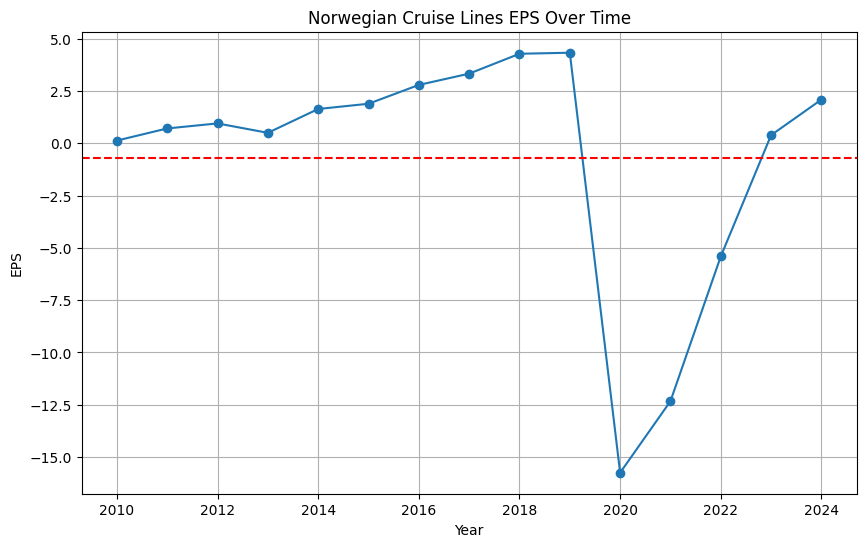

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(NHLC_df['Year'], NHLC_df['EPS'], marker='o', linestyle='-')
plt.title('Norwegian Cruise Lines EPS Over Time')
plt.xlabel('Year')
plt.ylabel('EPS')
plt.axhline(y = NHLC_df['EPS'].mean(), color = 'red', linestyle = '--')
plt.grid(True)
plt.show()

*From the plot it is clear that the EPS dropped significantly in 2020 and it can be attributed completely to Covid-19 as travel was banned all over the world and the company was out of operations for over 8 months. However, what is interesting to see is that NHLC experienced immediately after they resumed operations. NHLC had specifically laid out strategic plans, infrastructure development and cost management, also most importantly focused on debt reduction that was accumulated during the shutdown period. The specific plans will be discussed in details after forecasting to combine quantitative analysis with qualitative to further analyze the validity of forecast numbers.*

***Carnival Corporation Ltd. plot***

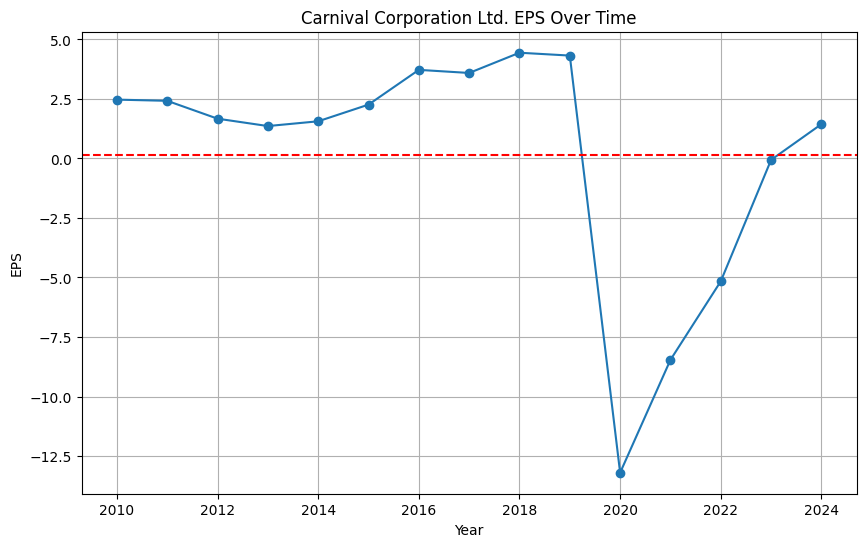

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(CCL_df['Year'], CCL_df['EPS'], marker = 'o', linestyle='-')
plt.title('Carnival Corporation Ltd. EPS Over Time')
plt.xlabel('Year')
plt.ylabel('EPS')
plt.axhline(y = CCL_df['EPS'].mean(), color = 'red', linestyle = '--')
plt.grid(True)
plt.show()

*Carnival Corporation as expected experienced an identical downfall as Norwegian cruise lines in 2020 and experienced a surplus growth immediately after, the only difference here is that visually the rise seems slightly subdued than what NHLC has. As NHLC planned and executed several recovery efforts after Covid, Carnival also followed on the same lines as they introduced fleet optimization and expansion, brand consolidation and most importantly attracting back guests with enhanced experience and pricing strategy. Similar to NHLC, we will further elaborate these initiatives as part of the qualitative analysis of the forecast.*

 **Performing Double Exponential Smoothing: Holt's Linear Method for NHLC and CCL EPS forecast for 2025.**

*The reason that Double Exponential Smoothing (Holt's method) is choosen for forecasting in this case for both the companies because it works well with data that has trend but no seasonality. Both the companies have a steep slope in 2020 and then gain momentum from there on which appears to be linear for both. Hence we can conclude that the trend is additive as data appears to be linear.*

**NHLC Forecast**

In [ ]:
NHLC_df['Year'] = pd.to_datetime(NHLC_df['Year'], format='%Y') + pd.offsets.YearEnd(0)
NHLC_df.set_index('Year', inplace=True)

In [ ]:
NHLC_eps = NHLC_df['EPS']
NHLC_eps.sort_index(inplace=True)
NHLC_eps

,EPS
Year,
2010-12-31,0.13
2011-12-31,0.71
2012-12-31,0.95
2013-12-31,0.50
2014-12-31,1.64
2015-12-31,1.89
2016-12-31,2.79
2017-12-31,3.33
2018-12-31,4.28


**Generating model with manually set parameters for smoothing and initial level**

In [ ]:
from statsmodels.tsa.api import Holt

NHLC_model_known = Holt(NHLC_eps, initialization_method = 'known', initial_level = 0.13,
                  initial_trend = -0.70, exponential = False)
NHLC_model_known_result = NHLC_model_known.fit(smoothing_level = 0.7, smoothing_trend = 0.3,
                                               optimized = False)
NHLC_model_known_result.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


Dep. Variable:,EPS,No. Observations:,15
Model:,Holt,SSE,677.629
Optimized:,False,AIC,65.158
Trend:,Additive,BIC,67.990
Seasonal:,None,AICC,75.658
Seasonal Periods:,None,Date:,"Mon, 28 Apr 2025"
Box-Cox:,False,Time:,12:36:23
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7000000,alpha,False
smoothing_trend,0.3000000,beta,False


**Generating a model with optimized values selected by the model**

In [ ]:
NHLC_estimated_model = Holt(NHLC_eps, initialization_method = 'estimated', damped = True)
NHLC_estimated_model_result = NHLC_estimated_model.fit()
NHLC_estimated_model_result.summary()

<ipython-input-12-4b07c5d4fe9f>:1: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  NHLC_estimated_model = Holt(NHLC_eps, initialization_method = 'estimated', damped = True)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


Dep. Variable:,EPS,No. Observations:,15
Model:,Holt,SSE,503.166
Optimized:,True,AIC,62.693
Trend:,Additive,BIC,66.233
Seasonal:,None,AICC,78.693
Seasonal Periods:,None,Date:,"Mon, 28 Apr 2025"
Box-Cox:,False,Time:,12:36:28
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.000000,beta,True


**Visualizing the best fit of the two models**

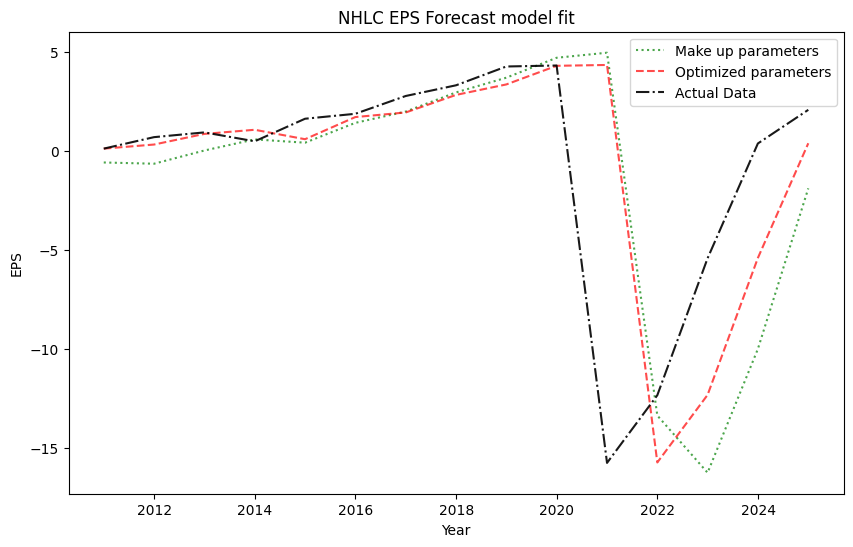

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(NHLC_model_known_result.fittedvalues, color = 'green', alpha = 0.7, linestyle = 'dotted', label = 'Make up parameters')
plt.plot(NHLC_estimated_model_result.fittedvalues, color = 'red', alpha = 0.7, linestyle = 'dashed', label = 'Optimized parameters')
plt.plot(NHLC_eps, color = 'black', alpha = 0.9, linestyle = 'dashdot', label = 'Actual Data')
plt.title('NHLC EPS Forecast model fit')
plt.xlabel('Year')
plt.ylabel('EPS')
plt.legend()
plt.show()

*By visualizing both the known model (manually set parameters) and optimized model against the actual EPS data (black line), it is evident that neither of the models do a good job of fitting with actual values. This is primarily because of the stuctural break that is introduced in the year 2020 where the company experiences a big break in the trend because of Covid shutdown and the two models are not able to capture this. Even when we see the initial years there is a slight lag in both the models compared to actual values and this lag gets inflated for the negative slope and is delayed for the optimized model to 2022 and for know model to 2023. Holt's linear method generally assumes a continuous, somewhat smooth trend (either rising or falling) but with the exponential downfall in 2020, this assumption gets violated. Another indicators is that the smoothing_level is very aggressive alpha is 1 which indicates that the optimized model places entire weight on the recent observations and is highly influenced by the 2020 value and hence overestimates the downfall and misses on the correct in 2021. Even the dampening factor does not work here and now there are only two options:
1. Modeling using ARIMA - However, 2020 is a shock trend which even ARIMA cannot smooth out and it shouldn't be because it is a natural phenomenon that was drastic in its magnitude and hence the entire series cannot be used because ARIMA requires stationarity in time-series and this shock violates that which means we would have to use post 2020 data and with that 2nd option becomes faster and easier to interpret.
2. Holt's Linear model with data post 2020 only.

**Holt's model for NHLC with post 2020 data**

In [ ]:
NHLC_eps_reduced = NHLC_eps.loc['2021-12-31':]
NHLC_eps_reduced

,EPS
Year,
2021-12-31,-12.33
2022-12-31,-5.41
2023-12-31,0.39
2024-12-31,2.09


In [ ]:
NHLC_model2 = Holt(NHLC_eps_reduced, initialization_method = 'estimated', damped_trend = True)
NHLC_model2_result = NHLC_model2.fit()
NHLC_model2_result.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


Dep. Variable:,EPS,No. Observations:,4
Model:,Holt,SSE,2.815
Optimized:,True,AIC,8.595
Trend:,Additive,BIC,5.527
Seasonal:,None,AICC,inf
Seasonal Periods:,None,Date:,"Mon, 28 Apr 2025"
Box-Cox:,False,Time:,12:36:45
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
smoothing_trend,3.7902e-09,beta,True


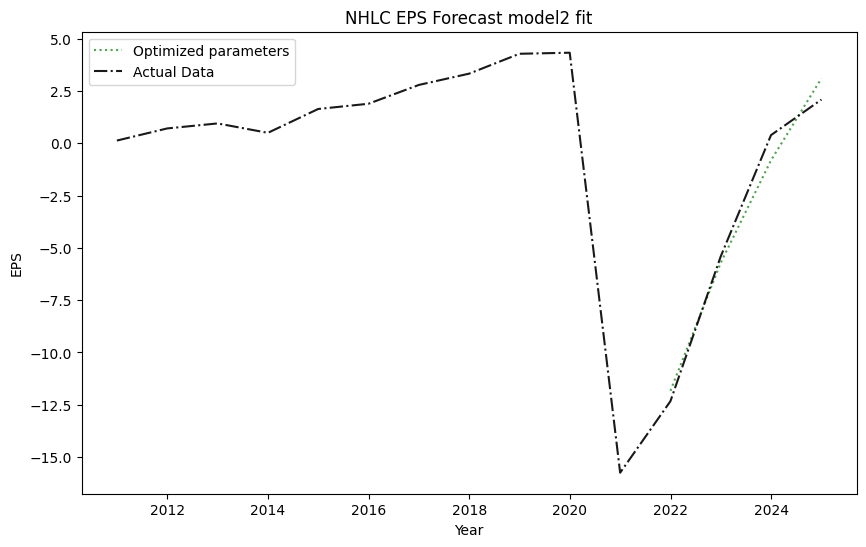

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(NHLC_model2_result.fittedvalues, color = 'green', alpha = 0.7, linestyle = 'dotted', label = 'Optimized parameters')
plt.plot(NHLC_eps, color = 'black', alpha = 0.9, linestyle = 'dashdot', label = 'Actual Data')
plt.title('NHLC EPS Forecast model2 fit')
plt.xlabel('Year')
plt.ylabel('EPS')
plt.legend()
plt.show()

*The fit is immediately visible when we use the data post 2020 shock, even with AIC comparison with previous optimized model on entire data series (8.595 v/s 62.963) and this confirms that we can go ahead with predicting the EPS for 2025.*

In [ ]:
NHLC_model2_result.forecast(steps = 1)

,0
2025-12-31,6.237737


*The forecast for EPS is 6.25 which does look a high jump from 2024, however there are several qualitative factors that justify this forecast for Norwegian Cruise Lines, in May 2024 NCLH launched the "Charting the Course" strategy focusing on 4 pillars: people, product, growth platform and performance. They had set the ambition of adjusted EPS of (2.45) in this strategic plan but there are chances they may well exceed this benchmark because they were are $2.09 by end of 2024 itself and this is the goal for year 2026. Another major postive and transformative step they have taken is adding eight state-of-the-art vessels, adding approximately 25000 berths across its three brands, there are several brand initiatives and enhanced guest experiences which can contribute to repeat business for them and will ultimately lead them to their Balance sheet strengthening.(Carnival Corporation & plc, 2024)*

**CCL Forecast**

In [ ]:
CCL_df['Year'] = pd.to_datetime(CCL_df['Year'], format='%Y') + pd.offsets.YearEnd(0)
CCL_df.set_index('Year', inplace=True)

In [ ]:
CCL_eps = CCL_df['EPS']
CCL_eps.sort_index(inplace=True)
CCL_eps = CCL_eps.loc['2021-12-31':]
CCL_eps

,EPS
Year,
2021-12-31,-8.46
2022-12-31,-5.16
2023-12-31,-0.06
2024-12-31,1.44


In [ ]:
from typing import Any
from statsmodels.tsa.api import Holt

CCL_model = Holt(CCL_eps, initialization_method = 'known', initial_level = -8.46,
                  initial_trend = 2.30, exponential = False)
CCL_model_result = CCL_model.fit(smoothing_level = 0.90, smoothing_trend = 0.10,
                                  optimized = False, damping_trend = 0.70)
CCL_model_result.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


Dep. Variable:,EPS,No. Observations:,4
Model:,Holt,SSE,15.769
Optimized:,False,AIC,13.487
Trend:,Additive,BIC,11.032
Seasonal:,None,AICC,inf
Seasonal Periods:,None,Date:,"Mon, 28 Apr 2025"
Box-Cox:,False,Time:,03:09:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.1000000,beta,False


In [ ]:
CCL_model2 = Holt(CCL_eps, initialization_method = 'estimated', damped_trend = True)
CCL_model2_result = CCL_model2.fit()
CCL_model2_result.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


Dep. Variable:,EPS,No. Observations:,4
Model:,Holt,SSE,1.569
Optimized:,True,AIC,6.255
Trend:,Additive,BIC,3.187
Seasonal:,None,AICC,inf
Seasonal Periods:,None,Date:,"Mon, 28 Apr 2025"
Box-Cox:,False,Time:,03:09:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
smoothing_trend,9.4321e-09,beta,True


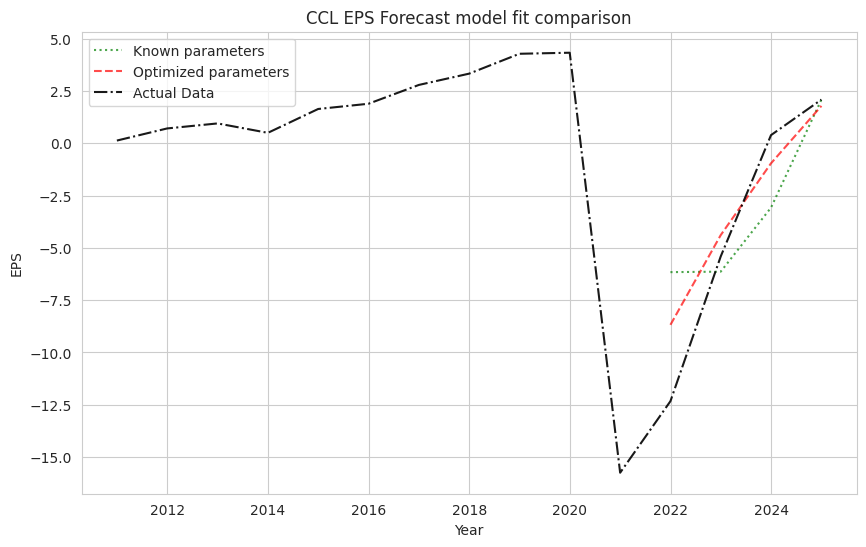

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(CCL_model_result.fittedvalues, color = 'green', alpha = 0.7, linestyle = 'dotted', label = 'Known parameters')
plt.plot(CCL_model2_result.fittedvalues, color = 'red', alpha = 0.7, linestyle = 'dashed', label = 'Optimized parameters')
plt.plot(NHLC_eps, color = 'black', alpha = 0.9, linestyle = 'dashdot', label = 'Actual Data')
plt.title('CCL EPS Forecast model fit comparison')
plt.xlabel('Year')
plt.ylabel('EPS')
plt.legend()
plt.show()

In [ ]:
CCL_model2_result.forecast(steps = 1)

,0
2025-12-31,3.983178


*Same as NHLC, even with Carnival Corporation we considered the data post 2020 exponential drop, and we tested the data with two models and similar to NHLC the optimized parameter model had a better fit to actual values. Hence that model was used for the forecast. The resulting EPS forecast for Carnival in 2025 is 3.98 which seems realistic and achievable for the company. It is also justifiable qualitatively as post pandemic Carnival introduced new ships, including the Carnival Jubilee, and ordered additional excel-class vessels to enhance guest experience and modernize its fleet and increase capacity.  The company has reduced its overall debt by $8 billion in 2024 and also implemented a premium pricing strategy, leading to a record revenue of 25 billion dollars. Based on this it can be concluded that this forecast seems apparent for the company based on their last year performance.(Norwegian Cruise Line Holdings, 2024)*

***References: ***
1. Carnival Corporation & plc. (2024). 2024 annual report. https://www.carnivalcorp.com/wp-content/uploads/2024/08/Carnival-Corporation-plc-2024-Annual-Report.pdf
2. Norwegian Cruise Line Holdings. (2024, February 27). Norwegian Cruise Line Holdings reports strong fourth quarter and record full year 2023 results. https://www.nclhltd.com/investors/news-events/press-releases/detail/677/norwegian-cruise-line-holdings-reports-strong-fourth

***Conjoint Analysis and Recommendations***

***Loading the voyage_options guest ratings dataset and the vendor cost dataset for analyzing price tradeoffs between amenities. ***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
voyage_options = pd.read_csv('voyage_options.csv')
vendor_cost = pd.read_csv('vendor_costs_654.csv')

In [ ]:
voyage_options.head()

,entertainment,dining,cabin,amenities,cocktail_credits,avg_rating
0,East Coast Folk,Maine Lobster Nova Scotia Seafood Buffet,Cozy with Fireplace,Top Deck Hot Tubs,1,8.313079
1,East Coast Folk,Maine Lobster Nova Scotia Seafood Buffet,Cozy with Fireplace,Top Deck Hot Tubs,2,9.435885
2,East Coast Folk,Maine Lobster Nova Scotia Seafood Buffet,Cozy with Fireplace,Top Deck Hot Tubs,3,8.540985
3,East Coast Folk,Maine Lobster Nova Scotia Seafood Buffet,Cozy with Fireplace,Winter Wellness Spa,1,8.415454
4,East Coast Folk,Maine Lobster Nova Scotia Seafood Buffet,Cozy with Fireplace,Winter Wellness Spa,2,9.241294


In [ ]:
vendor_cost.head()

,Item,Item Category,Cost Per Passenger (Dollars)
0,East Coast Folk,entertainment,25.0
1,Jazz Blues,entertainment,19.0
2,Acoustic Showcase,entertainment,12.0
3,DJ Dance,entertainment,9.0
4,Maine Lobster Nova Scotia Seafood Buffet,dining,24.0


**Cleaning the DJ dance value in the entertainment variable under voyage_options data frame to match it with vendor_cost data frame for easier mapping later on.**

In [ ]:
voyage_options['entertainment'] = voyage_options['entertainment'].replace('DJ_Dance', 'DJ Dance')

In [ ]:
voyage_options['cocktail_credits'] = voyage_options['cocktail_credits'].replace(1, '1 cocktail tickets per passenger')
voyage_options['cocktail_credits'] = voyage_options['cocktail_credits'].replace(2, '2 cocktail tickets per passenger')
voyage_options['cocktail_credits'] = voyage_options['cocktail_credits'].replace(3, '3 cocktail tickets per passenger')

In [ ]:
vendor_cost['Item Category'] = vendor_cost['Item Category'].replace('cocktail', 'cocktail_credits')

**Converting categorical variables into dummy variables for conjoint modeling**

In [ ]:
voyage_options2 = pd.get_dummies(voyage_options, drop_first = True, columns = ['entertainment',
                                 'dining', 'cabin', 'amenities', 'cocktail_credits'])
voyage_options2

,avg_rating,entertainment_DJ Dance,entertainment_East Coast Folk,entertainment_Jazz Blues,dining_Coastal Tapas & Tasting Stations,dining_Formal Multi-Course Plated,dining_Maine Lobster Nova Scotia Seafood Buffet,cabin_Modern Minimalist,cabin_Nautical Chic,cabin_Romantic Escape,amenities_Top Deck Hot Tubs,amenities_Winter Wellness Spa,cocktail_credits_2 cocktail tickets per passenger,cocktail_credits_3 cocktail tickets per passenger
0,8.313079,False,True,False,False,False,True,False,False,False,True,False,False,False
1,9.435885,False,True,False,False,False,True,False,False,False,True,False,True,False
2,8.540985,False,True,False,False,False,True,False,False,False,True,False,False,True
3,8.415454,False,True,False,False,False,True,False,False,False,False,True,False,False
4,9.241294,False,True,False,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,3.275835,True,False,False,False,False,False,True,False,False,False,True,True,False
572,5.478078,True,False,False,False,False,False,True,False,False,False,True,False,True
573,6.439684,True,False,False,False,False,False,True,False,False,False,False,False,False
574,3.069132,True,False,False,False,False,False,True,False,False,False,False,True,False


**Separating the independent and dependent variables, and using them to fit in the regression model to generate coefficients for analysis**

In [ ]:
X = voyage_options2.drop(columns = ['avg_rating'])
y = voyage_options2['avg_rating']

from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X, y)
LinearRegression()

LinearRegression()

In [ ]:
coef_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coef_df

,Coefficient
entertainment_DJ Dance,-0.697778
entertainment_East Coast Folk,0.444300
entertainment_Jazz Blues,0.355375
dining_Coastal Tapas & Tasting Stations,0.292936
dining_Formal Multi-Course Plated,-0.768749
dining_Maine Lobster Nova Scotia Seafood Buffet,1.497222
cabin_Modern Minimalist,-0.449679
cabin_Nautical Chic,0.312436
cabin_Romantic Escape,0.032533
amenities_Top Deck Hot Tubs,0.902993


In [ ]:
coef_df = coef_df.reset_index()
coef_df.columns = ['Variable', 'Coefficient']
coef_df

,Variable,Coefficient
0,entertainment_DJ Dance,-0.697778
1,entertainment_East Coast Folk,0.444300
2,entertainment_Jazz Blues,0.355375
3,dining_Coastal Tapas & Tasting Stations,0.292936
4,dining_Formal Multi-Course Plated,-0.768749
5,dining_Maine Lobster Nova Scotia Seafood Buffet,1.497222
6,cabin_Modern Minimalist,-0.449679
7,cabin_Nautical Chic,0.312436
8,cabin_Romantic Escape,0.032533
9,amenities_Top Deck Hot Tubs,0.902993


In [ ]:
coef_df['Variable'] = coef_df['Variable'].str.replace('_', ' ', n = 1)
coef_df

,Variable,Coefficient
0,entertainment DJ Dance,-0.697778
1,entertainment East Coast Folk,0.444300
2,entertainment Jazz Blues,0.355375
3,dining Coastal Tapas & Tasting Stations,0.292936
4,dining Formal Multi-Course Plated,-0.768749
5,dining Maine Lobster Nova Scotia Seafood Buffet,1.497222
6,cabin Modern Minimalist,-0.449679
7,cabin Nautical Chic,0.312436
8,cabin Romantic Escape,0.032533
9,amenities Top Deck Hot Tubs,0.902993


In [ ]:
coef_df['Variable'] = coef_df['Variable'].str.lower().str.replace('_', ' ').str.strip()
vendor_cost['Item'] = vendor_cost['Item'].str.lower().str.replace('_', ' ').str.strip()

In [ ]:
vendor_cost['Variable'] =  vendor_cost['Item Category'] + ' ' + vendor_cost['Item']

In [ ]:
vendor_cost

,Item,Item Category,Cost Per Passenger (Dollars),Variable
0,east coast folk,entertainment,25.00,entertainment east coast folk
1,jazz blues,entertainment,19.00,entertainment jazz blues
2,acoustic showcase,entertainment,12.00,entertainment acoustic showcase
3,dj dance,entertainment,9.00,entertainment dj dance
4,maine lobster nova scotia seafood buffet,dining,24.00,dining maine lobster nova scotia seafood buffet
5,formal multi-course plated,dining,31.00,dining formal multi-course plated
6,coastal tapas & tasting stations,dining,16.50,dining coastal tapas & tasting stations
7,casual fireside grill with hot cider,dining,17.25,dining casual fireside grill with hot cider
8,cozy with fireplace,cabin,9.00,cabin cozy with fireplace
9,nautical chic,cabin,15.00,cabin nautical chic


In [ ]:
coef_df_cost = pd.merge(coef_df, vendor_cost[['Cost Per Passenger (Dollars)', 'Variable']], on = 'Variable', how = 'left')
coef_df_cost

,Variable,Coefficient,Cost Per Passenger (Dollars)
0,entertainment dj dance,-0.697778,9.0
1,entertainment east coast folk,0.444300,25.0
2,entertainment jazz blues,0.355375,19.0
3,dining coastal tapas & tasting stations,0.292936,16.5
4,dining formal multi-course plated,-0.768749,31.0
5,dining maine lobster nova scotia seafood buffet,1.497222,24.0
6,cabin modern minimalist,-0.449679,8.0
7,cabin nautical chic,0.312436,15.0
8,cabin romantic escape,0.032533,12.0
9,amenities top deck hot tubs,0.902993,13.5


*Analysis of the coefficients generated for each iten category: The benchmark for selection of experiences provided by the Lobster Land management is 75 dollars per guest. In that case there have to be tradeoffs between the most preferred option by the guests and the costs associated with it. From an analysis perspective, it is essential to highlight the combination that is most preferred by the guest and then narrow the recommendation with a top-down approach. From comparison across categories, it is noticeable that guests have strong positive opinions about "maine lobster Nova Scotia Buffet" in comparison to other amenities provided so there should be a strong case to leave this out. If entertainment category in itself is analyzed, 'DJ dance is the least preferred option by the guests, while the most preferred is east coast folk and if we calculate the incremental benefit from DJ dance to East folk it is 0.253 however when we move further down to Jazz Blues the difference is only 0.01 in preference so either of the options work well considering cost trade-offs. We would still prefer analyzing other dining options and apart from the Buffet being the most preferred, the formal mult-course plated is less preferred than the Casual Fireside Grill so that can be completely ignored, and the second preferred option is coastal tapas and tasting stations however the drop in preference is 1.2 which is significant, the reason could be tasting stations while offer variety but is limited in quantity and we can speculate that guests are fans of seafood and would not want to miss a chance of enjoying the famous Lobster of Maine and the exclusive seafood from Nova Scotia, Canada. Even with the entertainment options, we can speculate that most of the guests are in their middle age and have opted for a cruise experience to have a laid back and relaxed experience and the vibe of East folk maritime music and Jazz aligns well with the sea and the open sky. Another important component of this experience is the cabin for the guests which is basically their home for the night, the most preferred option is the Nautical chic which resonates with their choice of music of maritimes and has upscale comfort, if we drop to the 2nd option the difference in preference is approximately 0.28 with Romantic Escape. However, the offer under Romantic escape is luxurious with a balcony view which is perfect for couples and so this tradeoff for the cost and the offering seems to align with the audience and is reasonable. Coming down to amenities - there is a strong preference for top deck hot tubs which we have seen have been a recquisite in many cruise lines and in this it seems to be a non-negotiator for Lobster land guests as well. Although the cost savings in alternative are healthy but the difference in ratings by guests seem to be considerable to make a trade off. Finally moving to the cocktail credits which let the guests enjoy free coctails that can be availed at any bar onboard, there is a strong preference for 2 free cocktails and interestingly guests don't feel positively about 3 free drinks and that can be attributed to most people choosing middleground option or since majority are couple guests, the preference here would be 2 free drinks per individual. The most important tradeoff here is between free cocktails and entertainment, while both the categories preferred options seem to have approximately same coefficients, it is important to note that this an optional incentive and entertainment is more seeked on a voyage than free drinks, so even with 1 free drink per passenger the guests would be okay but a compromise on entertainment category from Jazz Blues to Acoustic which is the reference can influence the guests to choose other cruise lines.*

*Final Recommendation for the Lobster Land Management: The major components that are critical for an enhanced voyage experience based on the guests ratings are: Dining, amenities, entertainment and cabin in this mentioned hierarchy.
**For Dining** - Maine Lobster and Nova Scotia seafood Buffet which consists of a premium buffet will be included in the experience at the cost of 24 dollars per passenger.
**Amenities** - Top deck hot tubs with panoramic ocean views, open day and night is strongly preferred and should be part of the esxperience at the cost of 13.5 dollars per passenger.
**Entertainment** - Although East Coast folk live music performance is the most preferred as per the guest ratings but the second preferred option Jazz Blues helps manage the cost trade offs better and hence that will part of the offering at 19 dollars per passenger.
**Cabin** - Although Nautical chic cabins are most preferred by the guests, even romantic escape themed cabins better suit the overall experience and help manage the cost tradeoffs better. These will be offered at 12 dollars per passenger.
**Cocktail_credits** - Finally, the optional incentive of free cocktails per passenger is considered, the preference from the guests is to have 2 free coctails per passenger, however to better consider the entertainment choices for the guest, the baseline option of 1 free drink per passenger is chosen to accomodate the 2nd best entertainment choice.

Final combination - Maine Lobster Nova Scotia Seafood Buffet + Jazz Blues + Romantic Escape + Top Deck Hot Tubs + 1 free cocktail_credit per passenger

Final cost - 24 + 19 + 12 + 13.5 + 4 = $72.5
So the recommendation is within the allocated budget and considers the guest preferences in the best possible way.*

# Classification

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
np.random.seed(654)

**Load & Clean the Dataset**

In [ ]:
cancellations = pd.read_csv('cruise_cancellations.csv')
cancellations.head()

,age,booking_lead_time,trip_length,cabin_type,group_size,loyalty_status,paid_in_full,prior_cruises,customer_income,email_engagement_score,phone_verified,has_insurance,on_mailing_list,website_visits_last_month,survey_participation,preferred_contact_method,travel_history_score,referral_source,gift_certificate_used,canceled
0,56,131,7,Oceanview,5,NaN,1,1,134181.36,0.41,1,0,1,4,No,Phone,62.70,Friend,0,0
1,69,293,5,Oceanview,5,NaN,1,2,104770.24,0.34,1,0,1,1,No,Email,56.59,Friend,0,0
2,46,171,7,Balcony,3,NaN,0,1,109135.01,0.38,1,0,0,3,Yes,Phone,57.58,Ad,0,1
3,32,183,3,Balcony,2,Silver,0,0,80108.53,0.58,0,0,0,2,No,Email,14.75,Search Engine,0,1
4,60,364,10,Oceanview,3,Silver,0,2,73401.55,0.50,1,0,1,3,Partial,Phone,47.49,Ad,0,0


In [ ]:
cancellations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2000 non-null   int64  
 1   booking_lead_time          2000 non-null   int64  
 2   trip_length                2000 non-null   int64  
 3   cabin_type                 2000 non-null   object 
 4   group_size                 2000 non-null   int64  
 5   loyalty_status             1016 non-null   object 
 6   paid_in_full               2000 non-null   int64  
 7   prior_cruises              2000 non-null   int64  
 8   customer_income            2000 non-null   float64
 9   email_engagement_score     2000 non-null   float64
 10  phone_verified             2000 non-null   int64  
 11  has_insurance              2000 non-null   int64  
 12  on_mailing_list            2000 non-null   int64  
 13  website_visits_last_month  2000 non-null   int64

In [ ]:
cancellations['loyalty_status'] = cancellations['loyalty_status'].fillna('None')

In [ ]:
cancellations['canceled'].value_counts()

,count
canceled,
0,1447
1,553


1447 NOT cancelled & 553 cancelled

In [ ]:
cancellations.describe()

,age,booking_lead_time,trip_length,group_size,paid_in_full,prior_cruises,customer_income,email_engagement_score,phone_verified,has_insurance,on_mailing_list,website_visits_last_month,travel_history_score,gift_certificate_used,canceled
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,49.114000,182.184000,7.237000,3.00500,0.714500,1.476500,84527.364645,0.503105,0.845500,0.398500,0.644500,2.989500,50.376555,0.092000,0.276500
std,17.926564,105.209014,3.151793,1.46835,0.451765,1.204647,29639.635285,0.144368,0.361518,0.489712,0.478784,1.700834,14.904381,0.289098,0.447379
min,18.000000,1.000000,3.000000,1.00000,0.000000,0.000000,-7095.200000,0.010000,0.000000,0.000000,0.000000,0.000000,0.370000,0.000000,0.000000
25%,34.000000,92.000000,5.000000,2.00000,0.000000,1.000000,64681.840000,0.400000,1.000000,0.000000,0.000000,2.000000,40.795000,0.000000,0.000000
50%,49.000000,177.000000,7.000000,3.00000,1.000000,1.000000,84033.095000,0.500000,1.000000,0.000000,1.000000,3.000000,50.535000,0.000000,0.000000
75%,65.000000,273.250000,10.000000,4.00000,1.000000,2.000000,104225.347500,0.600000,1.000000,1.000000,1.000000,4.000000,60.265000,0.000000,1.000000
max,79.000000,364.000000,14.000000,9.00000,1.000000,7.000000,184530.610000,0.930000,1.000000,1.000000,1.000000,10.000000,100.000000,1.000000,1.000000


In [ ]:
cancellations.loc[cancellations['customer_income'] < 0, 'customer_income'] = cancellations['customer_income'].median()

In [ ]:
cancellations_dummified = pd.get_dummies(cancellations, drop_first=True)

In [ ]:
X = cancellations_dummified.drop(columns=['canceled'])
y = cancellations_dummified['canceled']

print(X.shape)
print(y.shape)

(2000, 27)
(2000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=654, stratify=y
)

print(X_train.shape)
print(X_test.shape)

(1500, 27)
(500, 27)


In [ ]:
clf = RandomForestClassifier(random_state=654)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       362
           1       0.50      0.21      0.30       138

    accuracy                           0.72       500
   macro avg       0.63      0.57      0.56       500
weighted avg       0.68      0.72      0.68       500



In [ ]:
compare_means = cancellations_dummified.groupby('canceled').mean(numeric_only=True)
compare_means.T

canceled,0,1
age,49.087768,49.182640
booking_lead_time,188.024188,166.902351
trip_length,7.299240,7.074141
group_size,3.000691,3.016275
paid_in_full,0.774015,0.558770
prior_cruises,1.487906,1.446655
customer_income,86407.919599,80088.122251
email_engagement_score,0.504692,0.498951
phone_verified,0.838286,0.864376
has_insurance,0.395301,0.406872


Passengers with no loyalty status, lower income, and unpaid bookings are much more likely to cancel, and they tend to book less premium cabins.

**Iteration 1**

In [ ]:
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})
X_train_sm = sm.add_constant(X_train)
log_model = sm.Logit(y_train, X_train_sm)
log_res = log_model.fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.497151
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               canceled   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1472
Method:                           MLE   Df Model:                           27
Date:                Mon, 28 Apr 2025   Pseudo R-squ.:                  0.1571
Time:                        03:09:52   Log-Likelihood:                -745.73
converged:                       True   LL-Null:                       -884.67
Covariance Type:            nonrobust   LLR p-value:                 1.787e-43
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0275      0.596      0.046     

**Iteration 2**

In [ ]:
vars_drop = [
        'age',
        'trip_length',
        'group_size',
        'prior_cruises',
        'email_engagement_score',
        'phone_verified',
        'has_insurance',
        'on_mailing_list',
        'website_visits_last_month',
        'travel_history_score',
        'cabin_type_Interior',
        'cabin_type_Oceanview',
        'cabin_type_Suite',
        'loyalty_status_Platinum',
        'loyalty_status_Silver',
        'survey_participation_Partial',
        'survey_participation_Yes',
        'preferred_contact_method_Phone',
        'preferred_contact_method_Text',
        'referral_source_Friend',
        'referral_source_Search Engine',
        'referral_source_Social Media'
    ]

X_train_2 = X_train.drop(columns=vars_drop)
X_train_2_sm = sm.add_constant(X_train_2)
log_model_2 = sm.Logit(y_train, X_train_2)
log_reg_2 = log_model_2.fit()
print(log_reg_2.summary())

Optimization terminated successfully.
         Current function value: 0.507632
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               canceled   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1495
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Apr 2025   Pseudo R-squ.:                  0.1393
Time:                        03:09:52   Log-Likelihood:                -761.45
converged:                       True   LL-Null:                       -884.67
Covariance Type:            nonrobust   LLR p-value:                 3.813e-52
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
booking_lead_time        -0.0028      0.001     -5.091      0.000      -0.004      -0.

Passengers who haven’t paid in full, used a gift certificate, or lack a loyalty tier are significantly more likely to cancel.
Meanwhile, passengers who booked further in advance or have higher income are less likely to cancel.

In [ ]:
X_train_final = X_train.drop(columns=vars_drop)
X_test_final = X_test.drop(columns=vars_drop)
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_final, y_train)
y_pred = log_reg_model.predict(X_test_final)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       362
           1       0.45      0.25      0.32       138

    accuracy                           0.71       500
   macro avg       0.60      0.57      0.57       500
weighted avg       0.67      0.71      0.68       500

[[321  41]
 [104  34]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.71


In [ ]:
X_train_final.columns.tolist()

['booking_lead_time',
 'paid_in_full',
 'customer_income',
 'gift_certificate_used',
 'loyalty_status_None']

In [ ]:
test_passenger = pd.DataFrame([{
    'booking_lead_time': 120,
    'paid_in_full': 1,
    'customer_income': 85000,
    'gift_certificate_used': 0,
    'loyalty_status_None': 0
}])

In [ ]:
prediction = log_reg_model.predict(test_passenger)

probability = log_reg_model.predict_proba(test_passenger)[0][1]

print("Predicted class (1 = Canceled):", prediction[0])
print("Predicted probability of cancellation:", round(probability, 4))

Predicted class (1 = Canceled): 0
Predicted probability of cancellation: 0.1087


In [ ]:
test_passenger_2 = pd.DataFrame([{
    'booking_lead_time': 30,
    'paid_in_full': 0,
    'customer_income': 35000,
    'gift_certificate_used': 1,
    'loyalty_status_None': 0
}])

prediction_2 = log_reg_model.predict(test_passenger_2)

probability_2 = log_reg_model.predict_proba(test_passenger_2)[0][1]

print("Predicted class (1 = Canceled):", prediction_2[0])
print("Predicted probability of cancellation:", round(probability_2, 4))

Predicted class (1 = Canceled): 1
Predicted probability of cancellation: 0.52


The test passenger, who booked 120 days in advance, paid in full, has a loyalty level, has not used a gift certificate, and has a decent income, has a low risk of not traveling. In contrast, the second test passenger with a short booking lead time of 30 days, unpaid balance, used gift certificate, and has lower salary of $35,000 had a predicted probability of cancellation of 51.8%. This is consistent with the result of our model: passenger has a low risk of cancellation with longer lead time between booking and start of the cruise, payment in full, availability of loyalty level, and lack of gift certificate.

The cancellation prediction model offers valuable insights for Lobster Land management by identifying certain customer behaviors that are associated with a higher probability of canceling a cruise booking. The model shows that passengers who: have not paid for their cruise in full, are not participating in a loyalty program, or have used a gift certificate; are significantly more likely to cancel their reservation. On the other hand, those who: book in advance, have a higher income level, and paying in full; are significantly less likely to cancel their reservation.

From the results of the model, it is clear that the most at-risk passengers have several key characteristics. Lack of loyalty status was found to be an especially strong sign - revealing that passengers who booked for the first time or once may be less committed or more likely to cancel due to changes in plans or price sensitivity. The use of gift vouchers was also correlated with a higher risk of cancellation, possibly reflecting lower investment or 'vacation gift' bookings that may be more casual.

The results of this classification model can and should be transformed into actionable strategies for both customer retention and operational planning. Passengers identified as high-risk of cancelling (those with unpaid balances, no loyalty status, or gift certificate usage) can be identified early in the booking lifecycle and prioritized for targeted outreach. Marketing teams can prepare automated follow-up emails, personalized confirmations or time-sensitive incentives to encourage payment completion or strengthen commitment to the booking. From an operational standpoint, knowing which segments of passengers are most likely to cancel will allow Lobster Land to better forecast occupancy, manage overbooking, and adjust staffing and provisioning expectations for their cruises. This way the model serves not only as a forecasting tool but also as a decision support system, helping Lobster Land to prepare in advance to potential cancellations rather than reacting after they occur.

# Strategic Memo

separate document

[attached here](https://docs.google.com/document/d/1XeZaCyaWruMhOALcbpRtuLS9P0OCnt5Sg01jQkBVxrU/edit?usp=sharing)

# ***AB testing for Cruise Pics***

1. Loading the cruise_pics dataset in the environment. Understanding the dataset structure, checking for missing values, impossible values and performing some EDA.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cruise_pics = pd.read_csv('cruise_pics.csv')
cruise_pics.head()

,photo,clicked,time_on_page,num_followup_clicks,rating_of_photo,interest_score,device_type,time_of_day,booked_info_session,shared_email,saved_photo
0,Night Glow,0,13.8,0,8.1,6.76,desktop,afternoon,0,1,0
1,Night Glow,0,18.8,0,7.3,6.42,mobile,morning,0,0,0
2,Night Glow,0,9.9,0,7.8,6.34,mobile,afternoon,0,0,0
3,Night Glow,0,7.9,0,7.4,5.95,desktop,afternoon,0,0,0
4,Night Glow,1,73.0,2,7.4,16.70,mobile,afternoon,0,0,0


In [ ]:
cruise_pics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   photo                1007 non-null   object 
 1   clicked              1007 non-null   int64  
 2   time_on_page         1007 non-null   float64
 3   num_followup_clicks  1007 non-null   int64  
 4   rating_of_photo      1007 non-null   float64
 5   interest_score       1007 non-null   float64
 6   device_type          1007 non-null   object 
 7   time_of_day          1007 non-null   object 
 8   booked_info_session  1007 non-null   int64  
 9   shared_email         1007 non-null   int64  
 10  saved_photo          1007 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 86.7+ KB


In [ ]:
cruise_pics.describe()

,clicked,time_on_page,num_followup_clicks,rating_of_photo,interest_score,booked_info_session,shared_email,saved_photo
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,0.156902,23.081132,0.233366,7.432969,7.805005,0.083416,0.060576,0.103277
std,0.363889,23.576640,0.781342,1.087268,3.530199,0.276648,0.238669,0.304472
min,0.000000,0.500000,0.000000,4.200000,3.670000,0.000000,0.000000,0.000000
25%,0.000000,12.300000,0.000000,6.700000,5.870000,0.000000,0.000000,0.000000
50%,0.000000,15.700000,0.000000,7.500000,6.630000,0.000000,0.000000,0.000000
75%,0.000000,20.100000,0.000000,8.200000,7.445000,0.000000,0.000000,0.000000
max,1.000000,120.100000,6.000000,10.600000,22.630000,1.000000,1.000000,1.000000


**We have an impossible value in the rating_of_photo variable as the rating scale is 1 to 10 and we have a max value of 10.6. So we will consider that as a data entry error and change it to 10. Also, 22.63 interest_score is an outlier and can violate statistical test assumptions so that row will be removed.**

In [ ]:
cruise_pics['rating_of_photo'] = cruise_pics['rating_of_photo'].replace(10.6, 10)

In [ ]:
cruise_pics = cruise_pics[cruise_pics['interest_score']<= 15.00]

In [ ]:
cruise_pics['interest_score'].describe()

,interest_score
count,920.000000
mean,6.884424
std,1.895969
min,3.670000
25%,5.817500
50%,6.500000
75%,7.200000
max,14.780000


Exploring average interest_score by each cruise photo

In [ ]:
interest_score_means = cruise_pics.groupby('photo')['interest_score'].mean().round(2).sort_values(ascending = False)


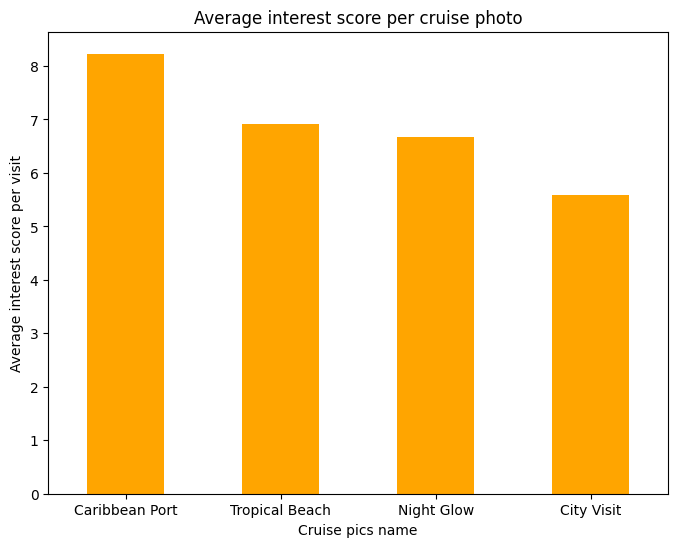

In [ ]:
plt.figure(figsize=(8, 6))
interest_score_means.plot(x = 'photo', y = 'interest_score', kind = 'bar', color = 'orange')
plt.title('Average interest score per cruise photo')
plt.xlabel('Cruise pics name')
plt.ylabel('Average interest score per visit')
plt.xticks(rotation = 0)
plt.show()

**Tropical beach here leads the race in terms of the interest_score which can proxy to engagement or consideration phase with the marketing efforts of the brand, however it is evident that the other tree cruise pics do not lag behind by a huge margin. Hence we need to perform statistical test to determine if this difference is truly significant and if so then we can evaluate which cruise pic drives the highest engagement.**

**With this data, we have two critical metrics that represent a consideration/engagement phase and booked_info_session that represents the conversion phase of the marketing funnel. So in order to make the business decision we can run two statistical tests to compare the cruise pics against interest_score and booked_info_session.**

Performing 1-tailed t-test between night glow and carribean_port.

*We are performing t-tests 6 times which means the chances of Type 1 error which is misclassification increases so we incorporate Bonferroni correction to adjust the alpha threshold*

In [ ]:
adjusted_alpha = 0.05 / 6
adjusted_alpha

0.008333333333333333

Null hypothesis (H0): The interest_score of night glow is less than or equal to the carribean port.

Alternate hypothesis (H1): The interest score of night glow is greater than the carribean port.

In [ ]:
from scipy import stats

night_glow = cruise_pics[cruise_pics['photo'] == 'Night Glow']['interest_score']
caribbean_port = cruise_pics[cruise_pics['photo'] == 'Caribbean Port']['interest_score']
city_visit = cruise_pics[cruise_pics['photo'] == 'City Visit']['interest_score']
tropical_beach = cruise_pics[cruise_pics['photo'] == 'Tropical Beach']['interest_score']


In [ ]:
t_stat, p_value = stats.ttest_ind(night_glow, caribbean_port, alternative='greater')

print("T-statistic:", t_stat)
print("One-tailed p-value:", p_value)

T-statistic: -8.939846351868479
One-tailed p-value: 1.0


**We failed to reject the null hypothesis as the result is not significant and even T-statistic is negative which means the interest_score of night glow is higher however that result is not significant and can be attributed to random chance.**

Performing a 1-tailed T-test between Night glow and city visit

Null hypothesis (H0): The interest_score of night glow is less than or equal to the city visit

Alternate hypothesis (H1): The interest score of night glow is greater than the city visit.

In [ ]:
t_stat, p_value = stats.ttest_ind(night_glow, city_visit, alternative='greater')

print("T-statistic:", t_stat)
print("One-tailed p-value:", p_value)

T-statistic: 10.611450287344818
One-tailed p-value: 5.274956225341654e-24


**For this test we can reject the null hypothesis and conclude that interest_score of night glow is greater than the city visit and the test is significant as p-value is way below alpha threshold.**

Performing a 1-tailed T-test between Night glow and tropical beach

Null hypothesis (H0): The interest_score of night glow is less than or equal to the tropical beach

Alternate hypothesis (H1): The interest score of night glow is greater than the city visit.

In [ ]:
t_stat, p_value = stats.ttest_ind(night_glow, tropical_beach, alternative='greater')

print("T-statistic:", t_stat)
print("One-tailed p-value:", p_value)

T-statistic: -2.555744016689126
One-tailed p-value: 0.9945340059622229


**We failed to reject the null hypothesis as the result is not significant and even T-statistic is negative which means the interest_score of night glow is higher however that result is not significant and can be attributed to random chance.**

Performing a 1-tailed T-test between Caribbean port and City visit

Null hypothesis (H0): The interest_score of Caribbean port is less than or equal to the City visit

Alternate hypothesis (H1): The interest score of Caribbean port is greater than the City visit.

In [ ]:
t_stat, p_value = stats.ttest_ind(caribbean_port, city_visit, alternative='greater')

print("T-statistic:", t_stat)
print("One-tailed p-value:", p_value)

T-statistic: 13.982424247119607
One-tailed p-value: 8.877001635568374e-38


**We can reject Null hypothesis here as the p-value is much lower than the alpha threshold and the difference of interest_score is also high between Caribbean port and city visit.**

Performing a 1-tailed T-test between Caribbean port and Tropical beach

Null hypothesis (H0): The interest_score of Caribbean port is less than or equal to the Tropical beach

Alternate hypothesis (H1): The interest score of Caribbean port is greater than the Tropical beach.

In [ ]:
t_stat, p_value = stats.ttest_ind(caribbean_port, tropical_beach, alternative='greater')

print("T-statistic:", t_stat)
print("One-tailed p-value:", p_value)

T-statistic: 6.7791237990506925
One-tailed p-value: 1.8994641599563492e-11


**Here we fail to reject null hypothesis as the p-value is greater than alpha threshold and the difference is almost 0.**

Performing a 1-tailed T-test between City visit and Tropical beach

Null hypothesis (H0): The interest_score of City visit is less than or equal to the Tropical beach

Alternate hypothesis (H1): The interest score of City visit port is greater than the Tropical beach.

In [ ]:
t_stat, p_value = stats.ttest_ind(city_visit, tropical_beach, alternative='greater')

print("T-statistic:", t_stat)
print("One-tailed p-value:", p_value)

T-statistic: -11.162597925106882
One-tailed p-value: 1.0


**Same case here as well, the test fails to reject null hypothesis because of high p-value and also the difference is in the opposite direction.**

**Explanation: Our purpose is to identify which of the cruise pics have the highest interest score and if that is a significant result and not just because of random chance. So we first calculate the avg interest score using the data and get this flow - Tropical beach > Caribbean port > Night glow > City visit. However, we need to be sure that this is a meaningful difference. Since t-test are sensitive to outliers we reduce the variation in the interest score by removing outliers higher than 15 so that we can get stable stats. However we can see that only significant test we are able to conclude is that Night glow has higher interest score than city visit and Caribbean port is greater than city visit but the comparison between the two Caribbean and night glow does not generate significant results and even the difference is in opposite direction i.e Carribean port has higher interest score than night glow but that result appears more by random chance. So in the engagement phase we are not able to differentiate between the cruise pics.**

Calculating booking sessions by each cruise picture.

In [ ]:
booking_rates = cruise_pics.groupby('photo')['booked_info_session'].count().sort_values(ascending=False)

print(booking_rates)

photo
Caribbean Port    252
Night Glow        240
City Visit        227
Tropical Beach    201
Name: booked_info_session, dtype: int64


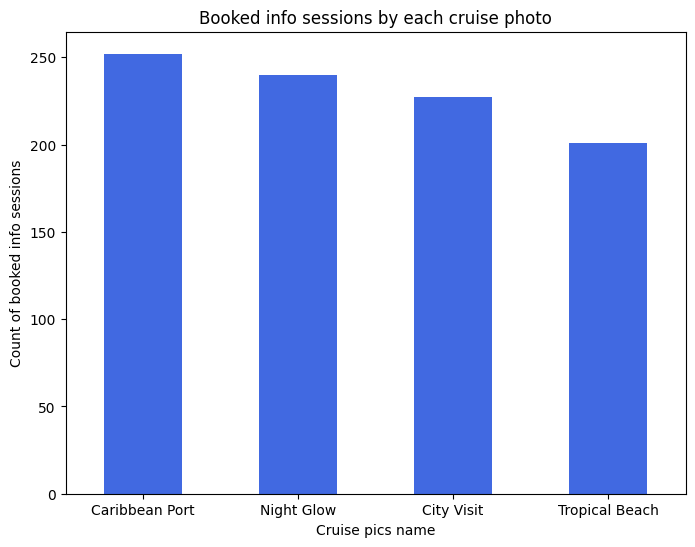

In [ ]:
plt.figure(figsize=(8, 6))
booking_rates.plot(x = 'photo', y = 'booked_info_session', kind = 'bar', color = 'royalblue')
plt.title('Booked info sessions by each cruise photo')
plt.xlabel('Cruise pics name')
plt.ylabel('Count of booked info sessions')
plt.xticks(rotation = 0)
plt.show()

Performing chi-square of independence to check if the cruise pic affects photo bookings.

Null Hypothesis (H0): The cruise photo has no effect on the number of info session bookings.

Alternate Hypothesis (H1): The cruise photo has an effect on the number of info session bookings.

In [ ]:
contingency_table = pd.crosstab(cruise_pics['photo'], cruise_pics['booked_info_session'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)

Chi-square statistic: 5.940401911123831
P-value: 0.1145460790212076
Degrees of freedom: 3


**As we move to the conversion phase where we look at info session bookings, this can be considered as the conversion phase. For this we have the calculated number of bookings that can be attributed to each cruise picture. Since count is solely based on recorded observations, there are no possibilities of random
occurence of these values. However, we need to evaluate that the cruise pic actually impacts the number of info session bookings. For this we use the Chi-square goodness of fit test and then conclude if we can use the above calculated counts to conclude which cruise pic is more beneficial from a marketing perspective. After performing the chi-test we can see that the photo does not impact info session bookings and the result is not significant as we have p value lower than 0.05 and also the chi-square statistic indicates that the difference between observed and expected values is large enough, however the difference is due to random chance, so in that case we cannot clearly conclude that the cruise photo impacts the visitors decision to book an info session. With this we can make a decision on the data that in both interest_score and number of info sessions booked, Caribbean port records the highest number and since conversions are most important for the business we can rely on the observations here to some extent and recommend Caribbean port cruise picture to be used in marketing campaigns by Lobster land management**

# Conclusion

All of these findings give Lobster Land a strategic foundation for successfully launching a cruise business. By focusing on high-traffic markets such as the Eastern Caribbean and Bahamas, investing in upgraded ships and designing flexible, experience-oriented spaces such as Vela Nera, the company can maximize guest satisfaction and operational efficiency from the start. Passenger segmentation results, cancellation models and A/B marketing tests ensure that Lobster Land can not only attract the right travelers, but also anticipate their needs, minimize risk and build loyalty over time.

***Tableau Results:**** Lobster Land Management should prioritize using newer, large-capacity ships to maximize exposure to high-volume, modernized traffic while minimizing potential operational risks.

***Summary Stats Results:**** Strong opportunities appear in the Eastern Caribbean and the Bahamas, especially at Major and Boutique ports, where both traffic and spending levels are high. These areas may offer the best return on investment for experiential offerings, pop-up activations, or new retail ventures.

***Segmentation Results:****
Premium Experience Ports align most directly with business objective. Popular Tourist Ports serve as reliable volume-drivers, ideal for standard or high-capacity sailings. Niche Interest Ports, while less predictable in terms of margin, offer an opportunity for innovation, differentiation, and deeper engagement with specialized consumer audiences. Given these results, we believe Premium Experience Ports are the most optimized for Lobster Land's profitability and operationability.

***Classification Results:**** The cancellation prediction model offers valuable insights for Lobster Land management by identifying certain customer behaviors that are associated with a higher probability of canceling a cruise booking. The results of this classification model can and should be transformed into actionable strategies for both customer retention and operational planning. Passengers identified as high-risk of cancelling (those with unpaid balances, no loyalty status, or gift certificate usage) can be identified early in the booking lifecycle and prioritized for targeted outreach. Marketing teams can prepare automated follow-up emails, personalized confirmations or time-sensitive incentives to encourage payment completion or strengthen commitment to the booking.

***Conjoint Analysis Results:****
Based on guest preference ratings and cost optimization, the final recommended voyage experience includes a Maine Lobster and Nova Scotia Seafood Buffet, Jazz Blues live entertainment, Romantic Escape cabins, Top Deck Hot Tubs, and one free cocktail credit per passenger, totaling 72.5usd per guest and staying within the 75usd target budget. This combination prioritizes the most valued components—dining, amenities, entertainment, and cabins—while balancing guest satisfaction with operational costs. By aligning offerings with guest preferences and using trade-offs, customer experience is maximized and optimize onboard revenue, ensuring a strong market entry.

***Forecasting Results:**** The cruise industry had a restructure after Covid and hence historical data before that has minimum prediction ability to predict future signals.

***A/B Testing Results:**** Conversion is the most important piece of the marketing funnel after all the efforts and for cruise industry the visual appeal creates a significant impact in either driving leads and converting them even though it maybe difficult to measure their significance in earlier stage of the funnel.

***Strategic memo:**** To attract key demographics including retirees, families, and young professionals, Lobster Land will introduce a new short-cruise experience featuring Vela Nera, a glass-enclosed restaurant and bar that transforms into an aquatic show venue. This design caters to Portland's weather by offering a year-round, captivating experience and strategically employs temporal layering to adapt the space throughout the day, ensuring each guest segment feels valued and creating memorable experiences.